In [1]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

In [2]:
# pandas options
pd.set_option("mode.copy_on_write", True)
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 6

# Numpy options
np.set_printoptions(precision = 2, suppress=True)

Source: MovieLens 1M movie ratings

McKinney’s: 13. Data Analysis Examples

1990년대 후반에서 2000년대 초반의 영화 평가에 대한 3개의 relational data로 이루어져 있고,
user_id, movie_id의 keys로 연결되어 있습니다.

- users: 유저에 대한 정보
- ratings: 평점에 대한 정보
- movies: 영화에 대한 정보

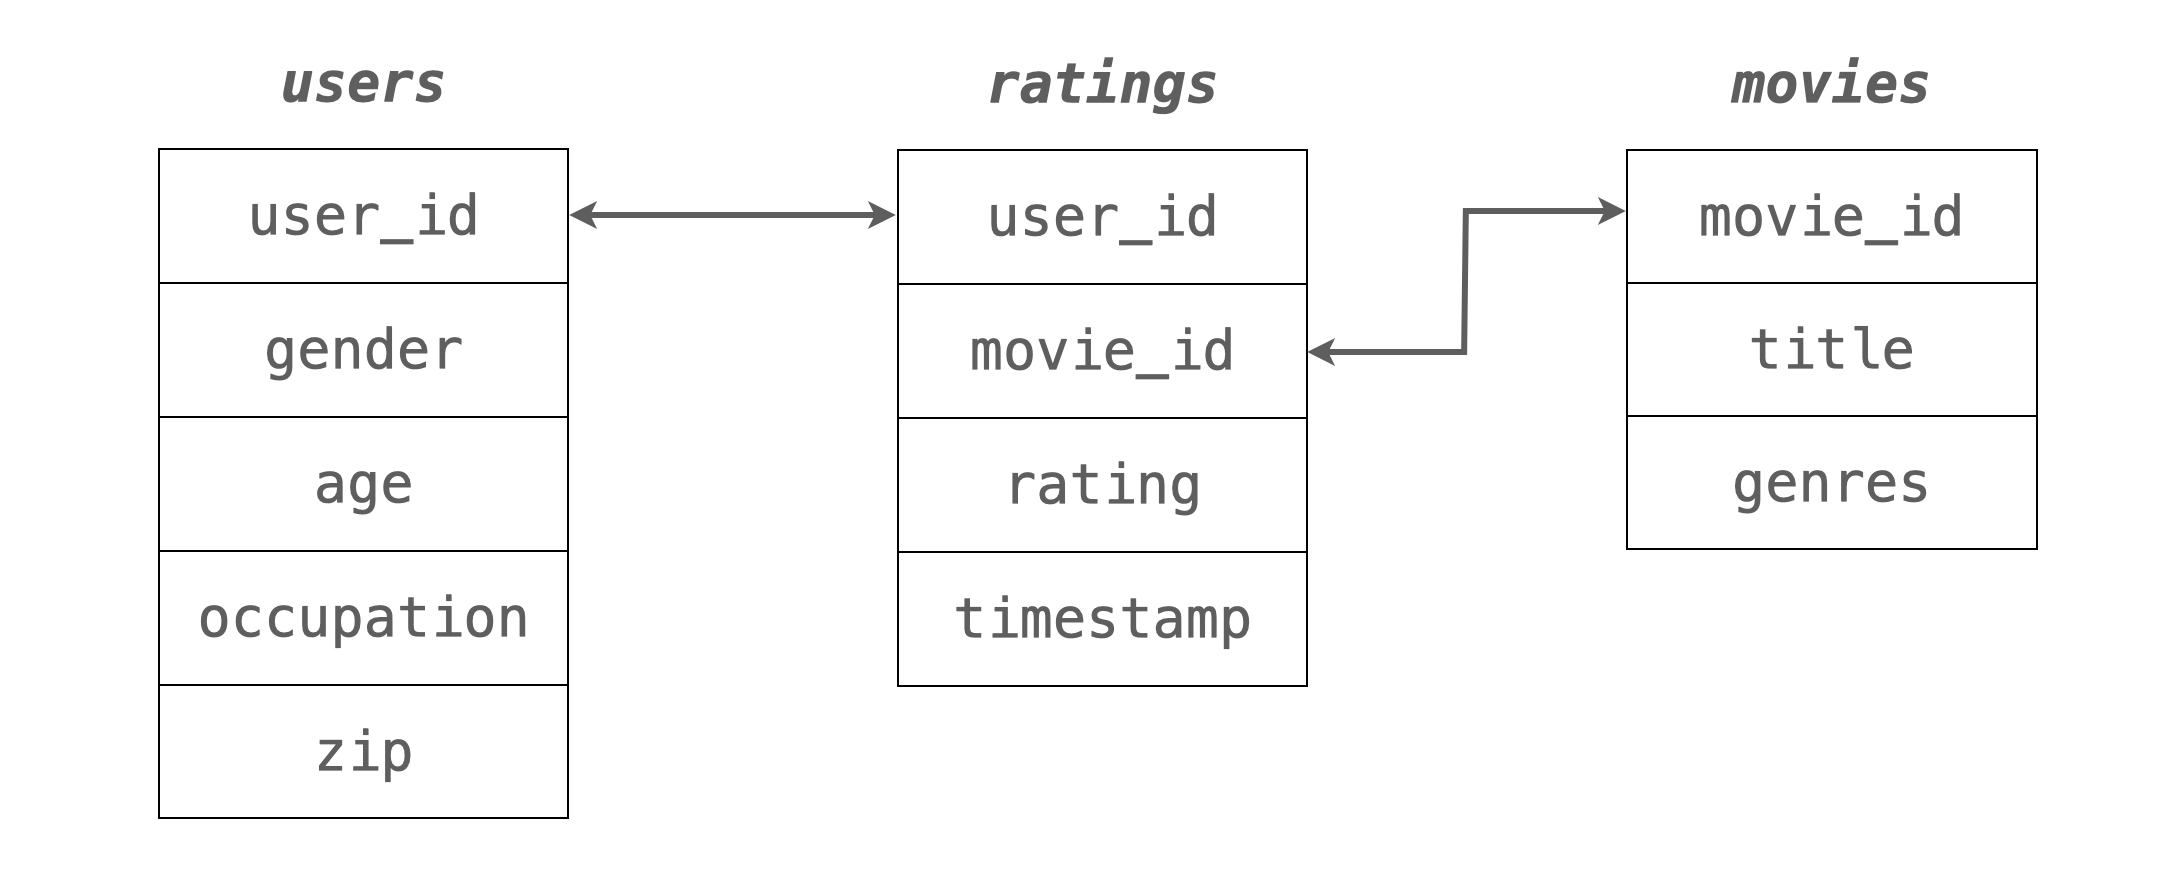

아래 데이터 링크가 원활하지 않을 시, 위의 MovieLens 1M movie ratings 사이트에서 직접 다운받으세요.
ml-1m.zip 압축파일을 풀어 users.dat, ratings.dat, movies.dat 세 파일을 아래 방식으로 읽어옵니다.

In [3]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table(
    "https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/movielens/users.dat",
    sep="::",
    header=None,
    names=unames,
    engine="python",
)
users

user_id gender  age  occupation    zip
0           1      F    1          10  48067
1           2      M   56          16  70072
2           3      M   25          15  55117
...       ...    ...  ...         ...    ...
6037     6038      F   56           1  14706
6038     6039      F   45           0  01060
6039     6040      M   25           6  11106

[6040 rows x 5 columns]

In [4]:
rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table(
    "https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/movielens/ratings.dat",
    sep="::",
    header=None,
    names=rnames,
    engine="python",
)
ratings

user_id  movie_id  rating  timestamp
0              1      1193       5  978300760
1              1       661       3  978302109
2              1       914       3  978301968
...          ...       ...     ...        ...
1000206     6040       562       5  956704746
1000207     6040      1096       4  956715648
1000208     6040      1097       4  956715569

[1000209 rows x 4 columns]

In [5]:
mnames = ["movie_id", "title", "genres"]
movies = pd.read_table(
    "https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/movielens/movies.dat",
    sep="::",
    header=None,
    names=mnames,
    engine="python",
)
movies.head(6)

movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy
5         6                         Heat (1995)         Action|Crime|Thriller



---



1. ratings과 users 데이터를 merge한 후 다음과 같은 user_rating 데이터셋을 만드세요.

In [6]:
#          user_id gender  age  occupation    zip  movie_id  rating  timestamp
# 0              1      F    1          10  48067      1193       5  978300760
# 1              1      F    1          10  48067       661       3  978302109
# 2              1      F    1          10  48067       914       3  978301968
# ...          ...    ...  ...         ...    ...       ...     ...        ...
# 1000206     6040      M   25           6  11106       562       5  956704746
# 1000207     6040      M   25           6  11106      1096       4  956715648
# 1000208     6040      M   25           6  11106      1097       4  956715569

In [7]:
user_rating = pd.merge(users, ratings)
user_rating

user_id gender  age  occupation    zip  movie_id  rating  timestamp
0              1      F    1          10  48067      1193       5  978300760
1              1      F    1          10  48067       661       3  978302109
2              1      F    1          10  48067       914       3  978301968
...          ...    ...  ...         ...    ...       ...     ...        ...
1000206     6040      M   25           6  11106       562       5  956704746
1000207     6040      M   25           6  11106      1096       4  956715648
1000208     6040      M   25           6  11106      1097       4  956715569

[1000209 rows x 8 columns]



---



2. 다음과 같이 영화(movie_id)별로 남녀(gender)에 따른 rating의 평균과 그 개수(count)을 구해보세요.

In [8]:
#    movie_id gender  mean  count
# 0         1      F  4.19    591
# 1         1      M  4.13   1486
# 2         2      F  3.28    176
# 3         2      M  3.18    525
# 4         3      F  3.07    136
# 5         3      M  2.99    342
...

Ellipsis

In [9]:
result = user_rating.groupby(['movie_id', 'gender']).agg({'rating': ['mean', 'count']})
result.columns = ['mean', 'count']
result.reset_index(inplace=True)
result

movie_id gender  mean  count
0            1      F  4.19    591
1            1      M  4.13   1486
2            2      F  3.28    176
...        ...    ...   ...    ...
7149      3951      M  4.04     23
7150      3952      F  3.76    105
7151      3952      M  3.79    283

[7152 rows x 4 columns]



---



3. 다음과 같은 플랏을 그려보고 평가의 수가 적을수록 그 편차가 커지는 현상을 확인해보세요.

- 혹시, 평가의 수가 많은 영화일수록 평가가 높아지는 현상에 대해 설명할 수 있을까요?
- 또한, 남녀의 평가에 차이가 벌어지는 현상을 설명할 수 있을까요?

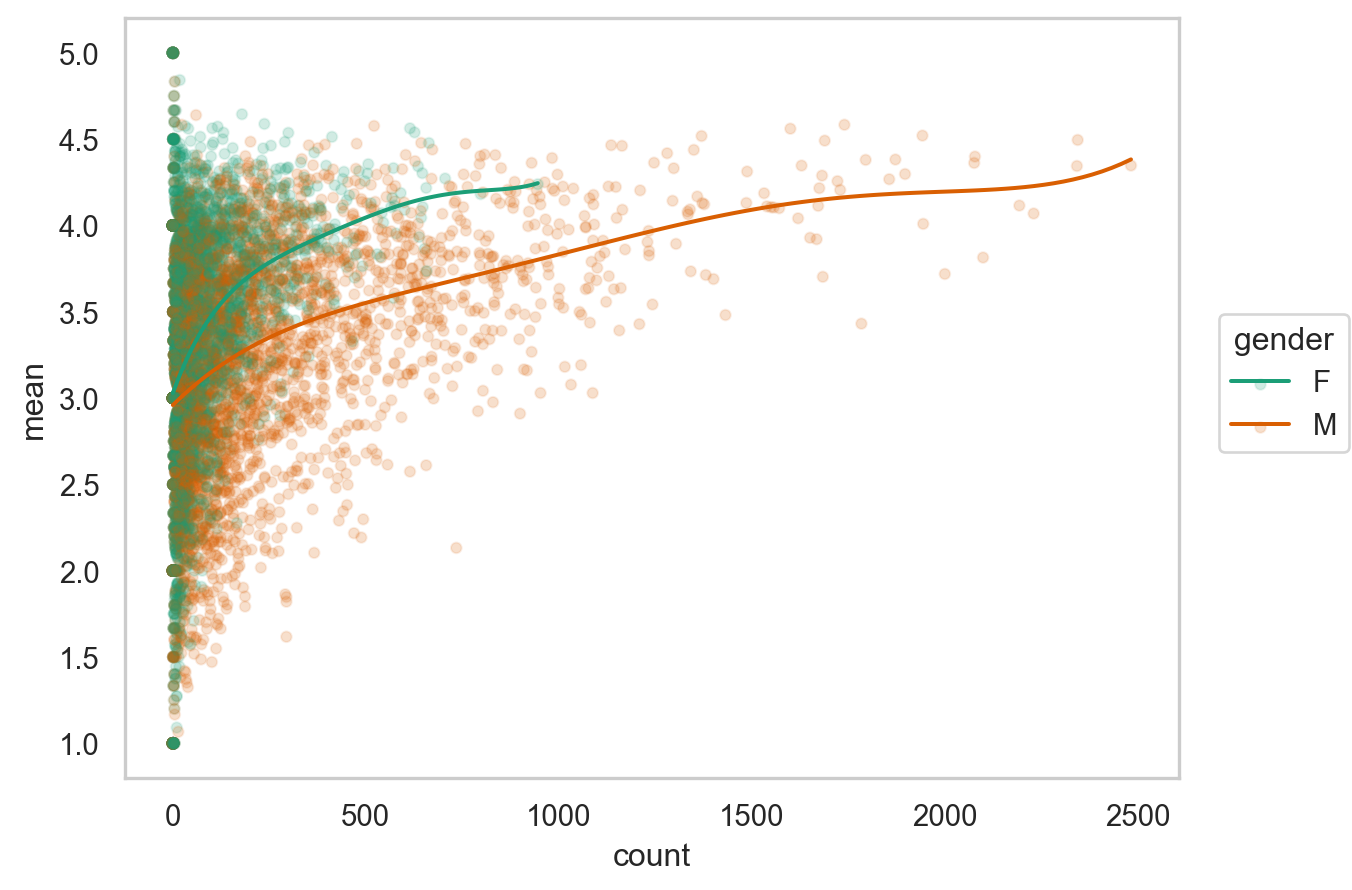

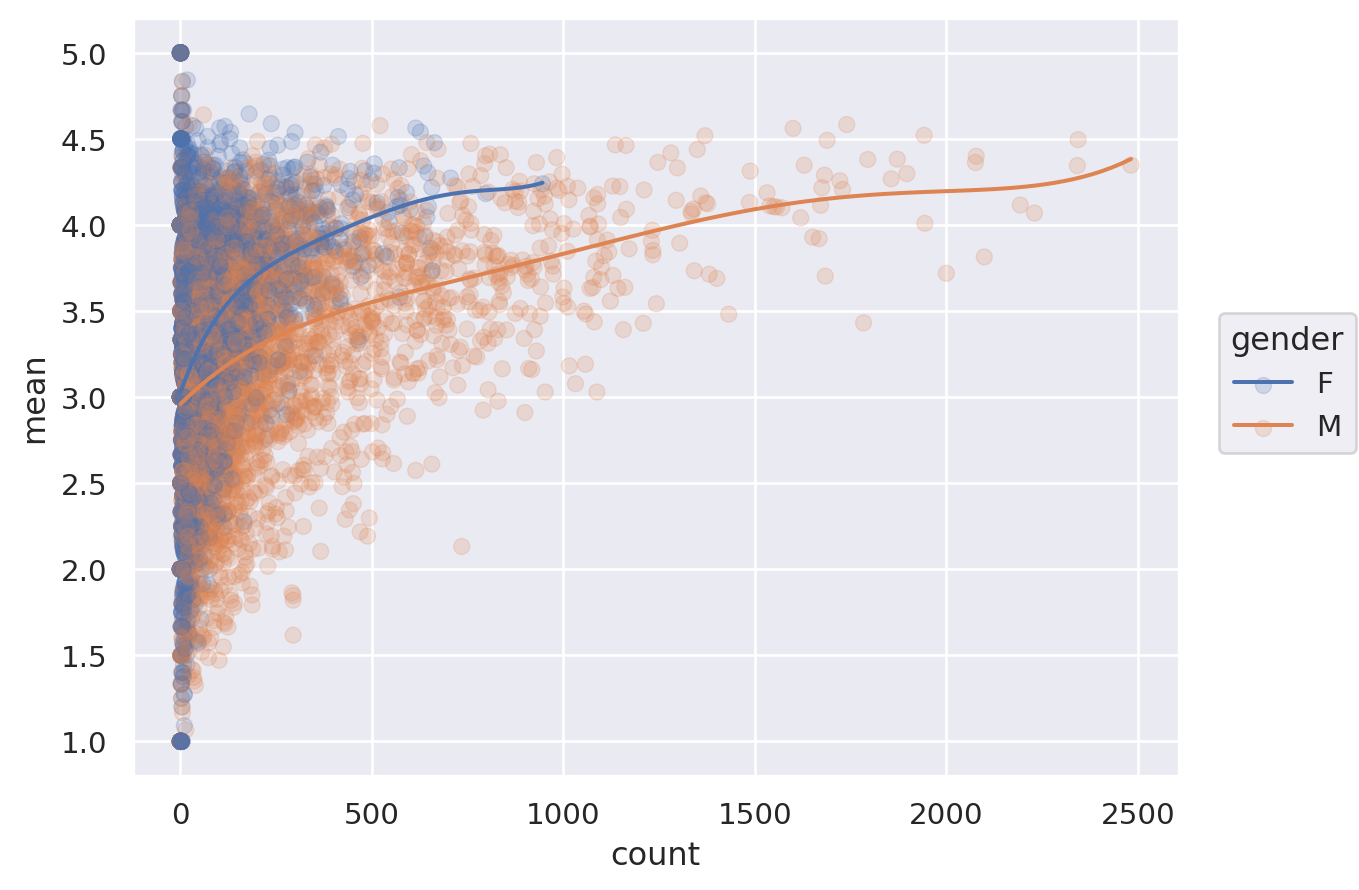

In [10]:
(
    so.Plot(result, x="count", y="mean", color="gender")
    .add(so.Dot(alpha=0.2))
    .add(so.Line(), so.PolyFit(5))
)

영화의 평점 수가 적을수록 그 편차가 커지는 현상은 일반적인 통계학의 개념 중 하나인 '작은 샘플 크기 효과'에 해당합니다. 작은 샘플에서는 각 데이터 포인트가 특정 값에 치우치거나 편차가 크게 나타날 수 있기 때문입니다. 이런 현상이 일어날 가능성이 높아지는 것은, 특히나 한쪽 성별의 평점이 많은 경우입니다.

반면, 평가 수가 많은 영화일수록 평가가 높아지는 현상은 '수많은 원인 중 하나'일 뿐, 절대적인 법칙은 아닙니다. 다만, 많은 사람들이 공감하고 높은 평가를 내리게 되는 경우가 있을 수 있기 때문에 일어날 수 있는 현상입니다. 그러나 이것은 통계학적으로 '작은 샘플 크기 효과'와는 정반대의 현상입니다.

마지막으로, 남녀의 평가에 차이가 벌어지는 현상은 사회적/문화적 요인이 작용한 결과물이라고 볼 수 있습니다. 예를 들어, 일부 연구에 따르면 남성들은 액션/스릴러와 같은 장르의 영화를 더 선호하고, 여성들은 로맨스/코미디와 같은 장르의 영화를 더 선호한다는 결과가 있습니다. 또한, 남성들은 영화 평가를 더 자주하며, 대체로 높은 점수를 부여하는 경향이 있다는 연구 결과도 있습니다. 이러한 요인들이 모두 합쳐져서, 남녀 간의 영화 평가 점수에 차이가 발생할 수 있습니다.



---



4. 3번에서 플랏에 .limit(x=(0, 500), y=(2.5, 4.5))을 추가하여 평가 개수(count)가 0에서 500사이이고, 평균 rating이 2.5에서 4.5 사이인 것으로 확대해서 보고, 평가 개수가 몇 개 정도부터 남녀의 평가의 차이가 대략 일정하게 되는지 살펴보세요.

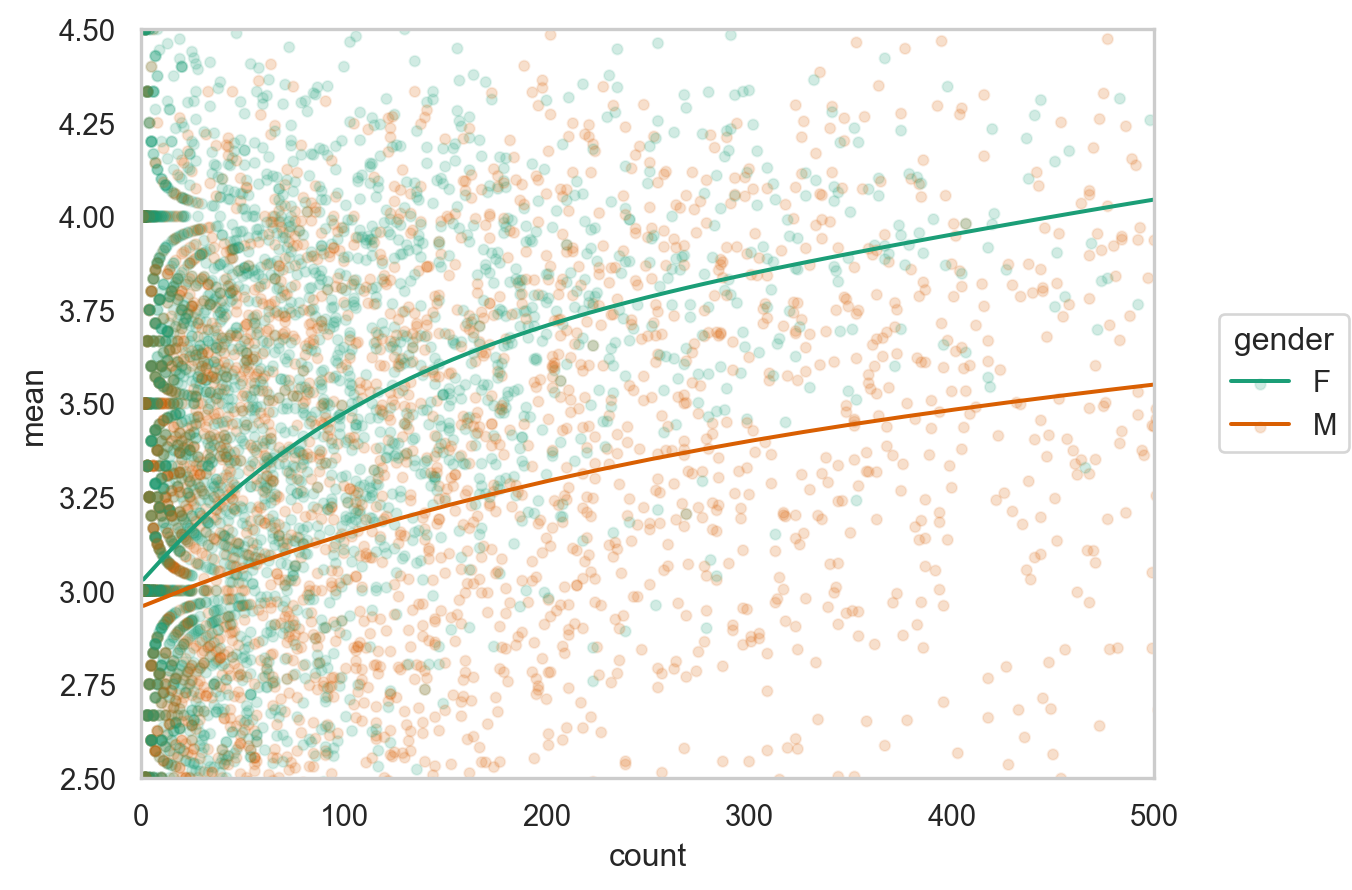

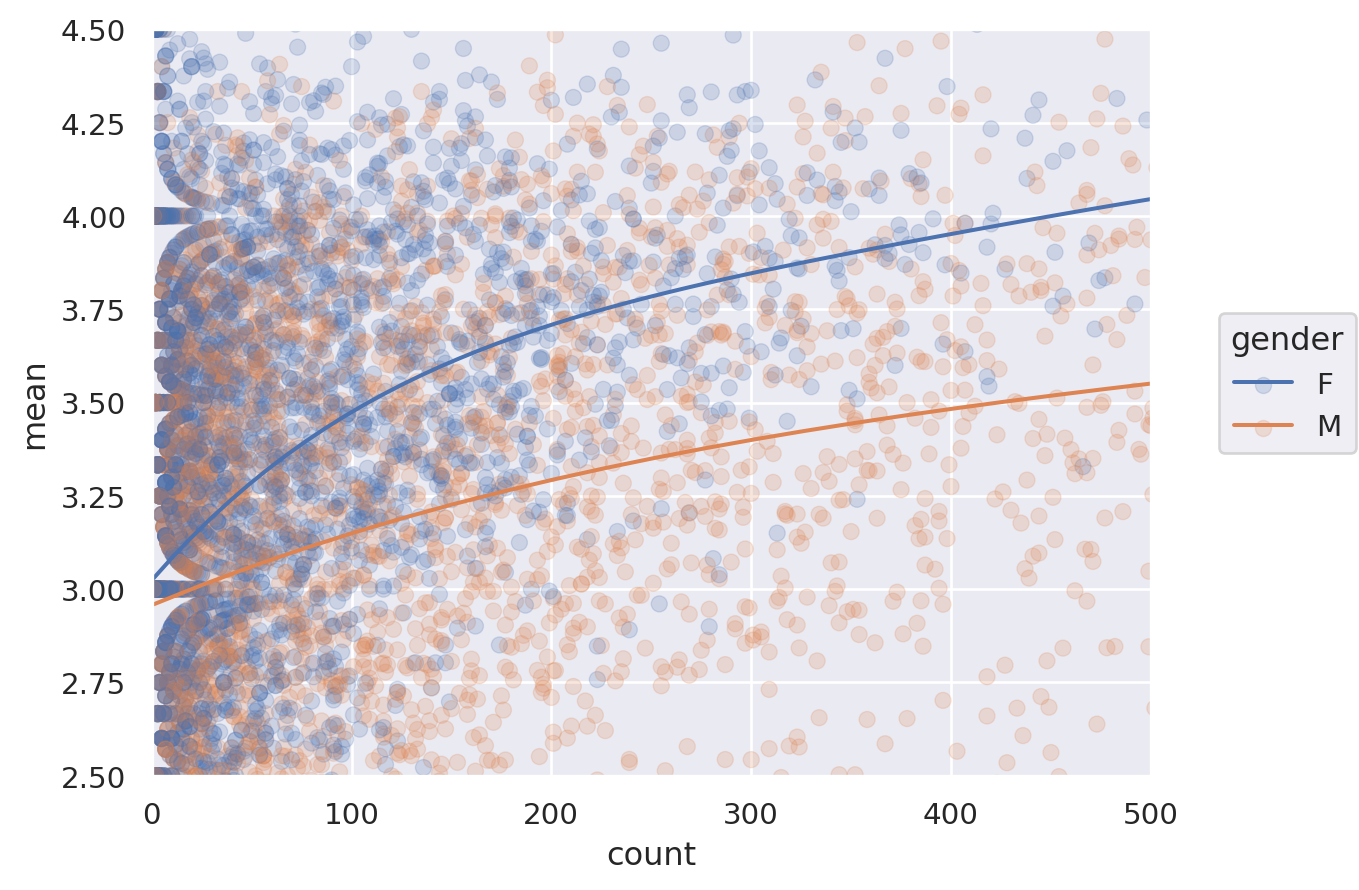

In [11]:
(
    so.Plot(result, x="count", y="mean", color="gender")
    .add(so.Dot(alpha=0.2))
    .add(so.Line(), so.PolyFit(5))
    .limit(x=(0, 500), y=(2.5, 4.5))
)

대략 200개 이후부터 차이가 일정하게 난다




---



5. 영화별로 남녀의 평가가 크게 갈리는 영화들을 찾기 위해

- 5.1 2번에서 구한 데이터에서 남녀 모두 rating이 300개 이상 있는 영화로만 간추려보세요.
- 5.2 이 데이터를 popular_movies라고 명명하고,
> - 이 데이터를 gender에 관해 wide format으로 변환한 후; pivot()을 이용
> - 여자의 평균 rating에서 남자의 평균 rating을 뺀 그 차이를 데이터에 추가한 후; assign()을 이용
> - 그 차이로 sort한 후,
- 5.3 여자의 선호가 더 높은 영화 5편과 남자의 선호가 더 높은 영화 5편 (선호 차이의 크기 순서로)을 구해보세요.
> - 이를 위해서 movies 테이블 안의 영화제목(title)을 merge()를 이용해 추가하세요.

In [12]:
# 5.1
res_cnt = result.pivot(index='movie_id',columns=['gender'],values='count')
popular_movies = res_cnt.query('F>=300 & M>=300')
popular_movies

gender        F       M
movie_id               
1        591.00 1486.00
11       379.00  654.00
17       420.00  415.00
...         ...     ...
3481     377.00  996.00
3578     385.00 1539.00
3751     367.00  962.00

[131 rows x 2 columns]

In [13]:
# 5.2
diff = popular_movies.assign(rating_diff=popular_movies['F'] - popular_movies['M']).sort_values(by='rating_diff')
diff_merge = pd.merge(diff,movies,on='movie_id')
diff_merge

movie_id      F       M  rating_diff  \
0         589 456.00 2193.00     -1737.00   
1         260 647.00 2344.00     -1697.00   
2        1196 648.00 2342.00     -1694.00   
..        ...    ...     ...          ...   
128       902 313.00  363.00       -50.00   
129       914 300.00  336.00       -36.00   
130        17 420.00  415.00         5.00   

                                                 title  \
0                    Terminator 2: Judgment Day (1991)   
1            Star Wars: Episode IV - A New Hope (1977)   
2    Star Wars: Episode V - The Empire Strikes Back...   
..                                                 ...   
128                      Breakfast at Tiffany's (1961)   
129                                My Fair Lady (1964)   
130                       Sense and Sensibility (1995)   

                                genres  
0               Action|Sci-Fi|Thriller  
1      Action|Adventure|Fantasy|Sci-Fi  
2    Action|Adventure|Drama|Sci-Fi|War  
..                                 ...  
128                      Drama|Romance  
129                    Musical|Romance  
130                      Drama|Romance  

[131 rows x 6 columns]

In [14]:
# 선호의 차이 여자가 더 큰 5개의 데이터
diff_merge.sort_values(by='rating_diff',ascending=False).head()

movie_id      F      M  rating_diff                           title  \
130        17 420.00 415.00         5.00    Sense and Sensibility (1995)   
129       914 300.00 336.00       -36.00             My Fair Lady (1964)   
128       902 313.00 363.00       -50.00   Breakfast at Tiffany's (1961)   
127       339 305.00 368.00       -63.00  While You Were Sleeping (1995)   
126      1188 304.00 372.00       -68.00        Strictly Ballroom (1992)   

              genres  
130    Drama|Romance  
129  Musical|Romance  
128    Drama|Romance  
127   Comedy|Romance  
126   Comedy|Romance

In [15]:
# 선호의 차이 남자가 더 큰 5개의 데이터
diff_merge.head()

movie_id      F       M  rating_diff  \
0       589 456.00 2193.00     -1737.00   
1       260 647.00 2344.00     -1697.00   
2      1196 648.00 2342.00     -1694.00   
3      1210 653.00 2230.00     -1577.00   
4      2571 514.00 2076.00     -1562.00   

                                               title  \
0                  Terminator 2: Judgment Day (1991)   
1          Star Wars: Episode IV - A New Hope (1977)   
2  Star Wars: Episode V - The Empire Strikes Back...   
3  Star Wars: Episode VI - Return of the Jedi (1983)   
4                                 Matrix, The (1999)   

                                genres  
0               Action|Sci-Fi|Thriller  
1      Action|Adventure|Fantasy|Sci-Fi  
2    Action|Adventure|Drama|Sci-Fi|War  
3  Action|Adventure|Romance|Sci-Fi|War  
4               Action|Sci-Fi|Thriller



---



6. 3번 플랏에서 유추되듯이 평가의 개수가 영화의 완성도 혹은 인기도를 파악할 수 있는 대략적인 지표가 될 수 있습니다. 즉, 평가수가 많을 수록 평점도 높습니다. 따라서 평가 개수를 바탕으로 인기도(popularity)를 수치화 하려고 합니다.

- 우선, 3번 플랏에서 평가수가 같다면 여성이 더 높은 평점을 주는 것으로 보이는데, 이 현상을 다음과 같이 자세히 들여다 봅니다.
> - 다음과 같은 count를 20개의 구간으로 discretize해주는 함수를 성별로 grouping된 user_rating 데이터에 apply() 하세요.

In [16]:
def popular(g):
    g["popularity"] = pd.qcut(g["count"], q=20, labels=False)
    return g

- 이 함수의 의미를 파악하고, 20단계 (0, 1, 2, …, 19)의 popularity가 성별을 고려하여 각 영화에 부여되었음을 이해합니다. (각각은 평가 개수 5%에 해당)
- 이제, 다음과 같이 popularity에 따라 평점이 높아지는 현상을 성별을 고려한 후 본 결과를 아래와 같이 플랏을 통해 확인해봅니다.
- 남성 유저와 여성 유저의 비율에 큰 차이 (4331:1709)가 있는 것을 고려했을 때, 어떻게 이 현상을 설명할 수 있을까요?

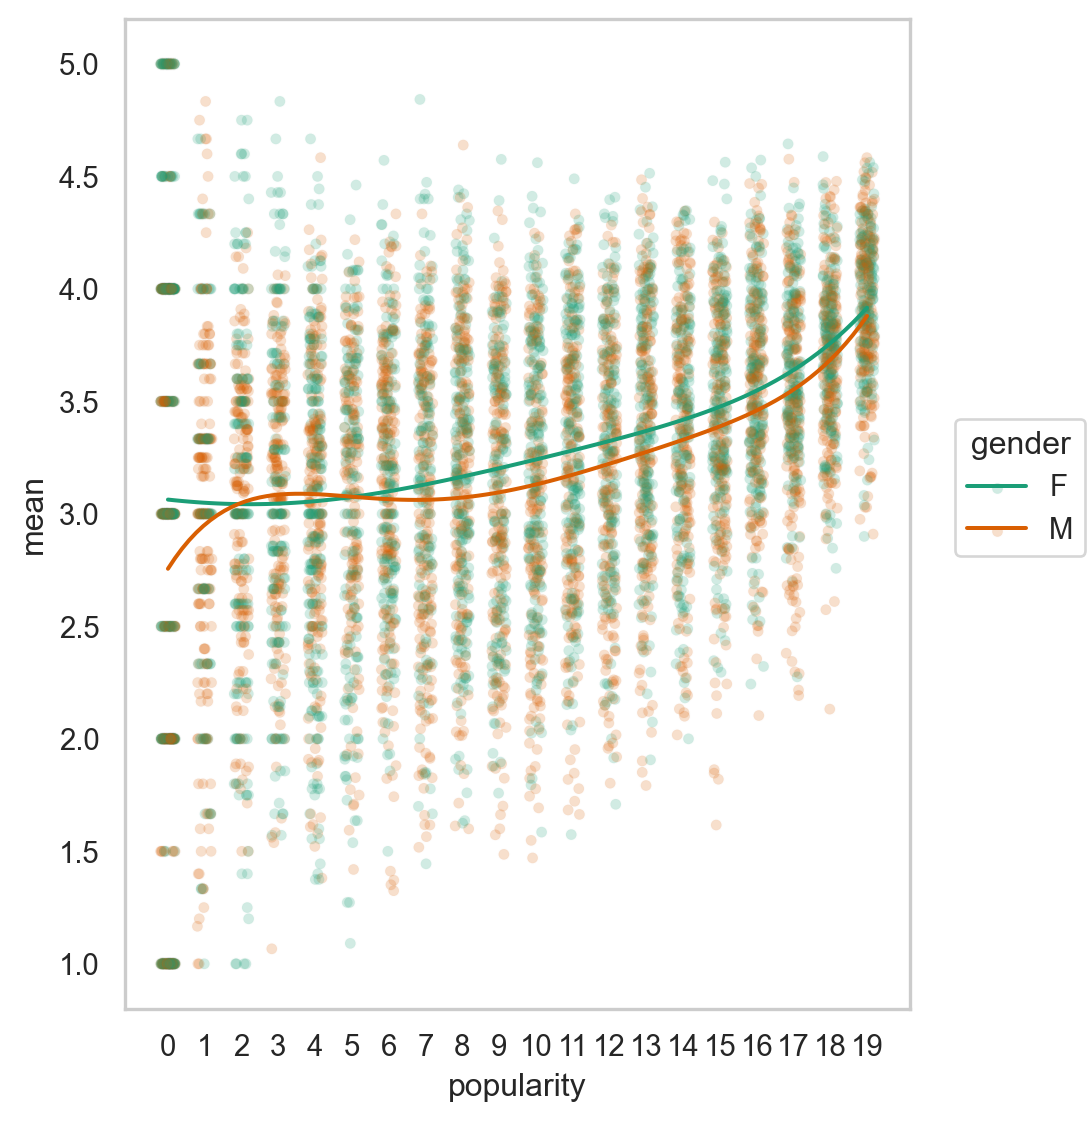

In [17]:
popular_apply = result.groupby('gender').apply(popular)
popular_apply

<ipython-input-17-273adaa566c1>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  popular_apply = result.groupby('gender').apply(popular)


movie_id gender  mean  count  popularity
0            1      F  4.19    591          19
1            1      M  4.13   1486          19
2            2      F  3.28    176          17
...        ...    ...   ...    ...         ...
7149      3951      M  4.04     23           4
7150      3952      F  3.76    105          15
7151      3952      M  3.79    283          15

[7152 rows x 5 columns]

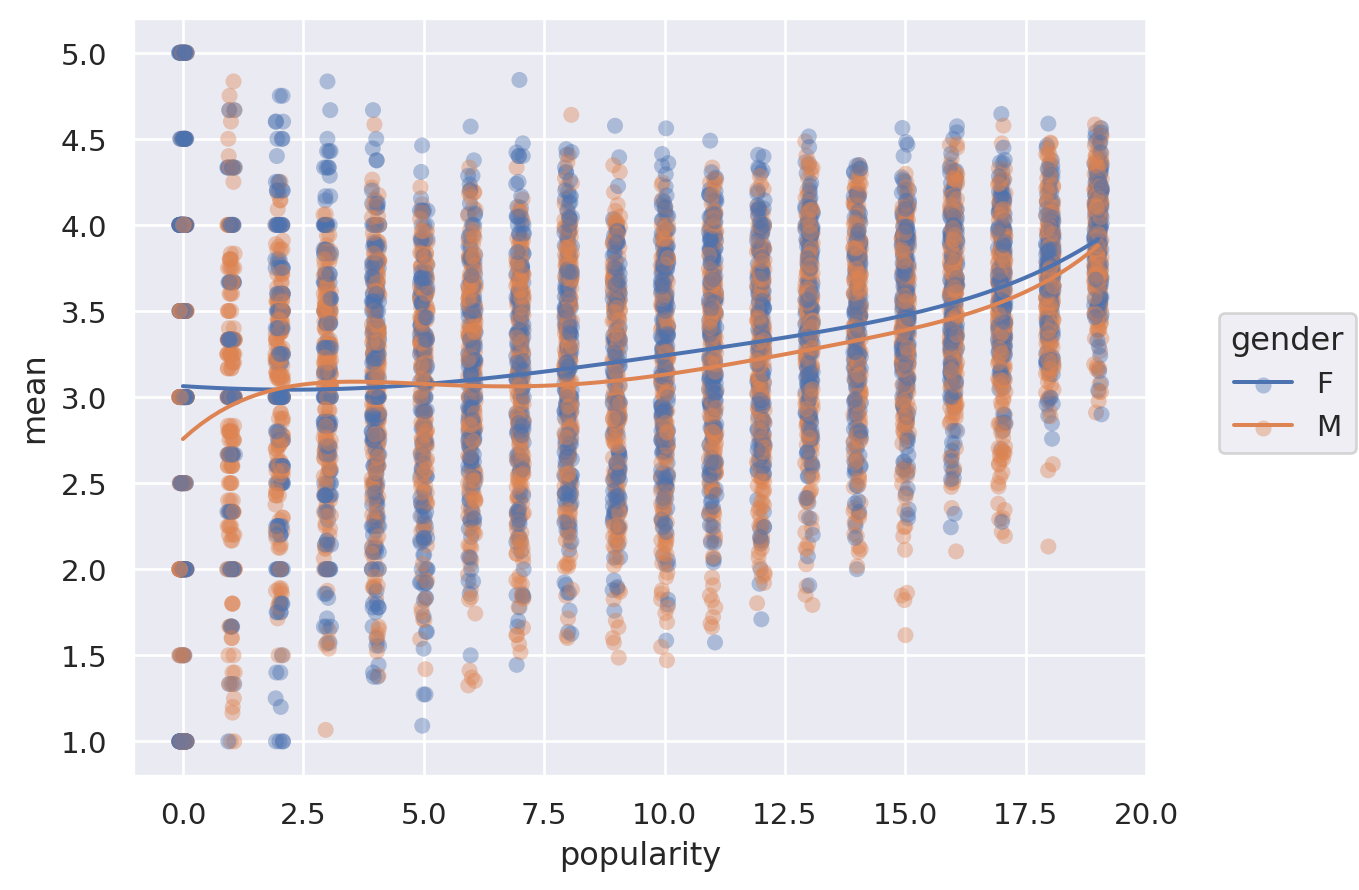

In [18]:
(
    so.Plot(popular_apply, x='popularity', y='mean', color='gender') 
    .add(so.Dot(alpha=.4, edgewidth=0), so.Jitter())
    .add(so.Line(), so.PolyFit(5))
    
)

popularity에 따라 평점이 높아지는 현상이 나타나는 이유는, 평가 개수가 많은 영화일수록 해당 영화에 대한 정보가 더 많아지기 때문입니다. 따라서 해당 영화에 대한 평균 평점이 높아질 가능성이 높아지게 됩니다.

성별을 고려해보면, 여성 유저의 수가 남성 유저의 수보다 적은 것으로 보아, 인기 있는 영화에 대한 여성 유저의 평가 비율이 상대적으로 더 높을 수 있습니다. 또한, 성별에 따라 영화에 대한 취향이 다를 수 있기 때문에, 인기 있는 영화라 할지라도 남성과 여성의 평균 평점이 다를 수 있습니다.

따라서, 이러한 이유로 popularity에 따라 평점이 높아지는 현상이 나타나며, 성별을 고려해보면 여성 유저의 영화 취향에 따라 인기 있는 영화에 대한 평가 비율이 높아질 수 있으며, 이에 따라 인기 있는 영화라 할지라도 남성과 여성의 평균 평점이 다를 수 있다는 것을 설명할 수 있습니다.



---




7. 남녀별로 평점의 편차가 큰, 즉 의견이 분분한 영화들을 구해봅니다.

- 5번에서 구한 popular_movies에 한해 남녀 각각에 대해 영화별로 평점의 편차를 표준편차로 구해보고,
> 5번을 못 구한 경우, 다음 파일을 다운로드 받아 popular_movies로 사용합니다.
- 남녀별로 편차 상위 2개만 표시합니다. (동등한 순서 모두 포함)
> 다음 method를 이용하는 함수를 정의하고 apply()로 적용해 봅니다


```
# 코드로 형식 지정됨
df.nlargest(n, "var", keep="all")
```
영화제목을 movies 데이터와 merge하여 표시합니다.



In [19]:
result["std"] = (result["mean"] - result.groupby("gender")["mean"].transform("mean")) / result.groupby("gender")["mean"].transform("std")
result

movie_id gender  mean  count   std
0            1      F  4.19    591  1.25
1            1      M  4.13   1486  1.33
2            2      F  3.28    176 -0.02
...        ...    ...   ...    ...   ...
7149      3951      M  4.04     23  1.20
7150      3952      F  3.76    105  0.66
7151      3952      M  3.79    283  0.83

[7152 rows x 5 columns]

In [20]:
# 남녀 편차 상위2개 한번에 
def get_top_std_rows(df, n=2):
    std = df['count'].std()
    top_std = df.nlargest(n, 'std', keep='all')
    return top_std

gender_res = result.groupby('gender').apply(get_top_std_rows, n=2)
gender_res

movie_id gender  mean  count  std
gender                                        
F      101         53      F  5.00      2 2.39
       758        394      F  5.00      1 2.39
       1273       681      F  5.00      1 2.39
...               ...    ...   ...    ...  ...
M      5908      3280      M  5.00      1 2.60
       6342      3517      M  5.00      1 2.60
       6589      3656      M  5.00      1 2.60

[38 rows x 5 columns]



---



8. 이제 초점을 유저들에게 돌려, 유저들의 특성을 고려해봅니다. 일반적으로 같은 소스(사람)에서 온 데이터는 비슷한 성향을 띄는데 이를 depenency의 문제라고 합니다. 한 가족 구성원으로부터 왔다든가, 같은 학교의 학생들과 같이 구체적으로 명시하기 어렵지만 데이터 상에서 비슷한 군집을 이룹니다. 이 데이터의 경우 동일한 유저들의 특성이 존재할 수 있는데, 예를 들어 후한 점수를 준다든가, 같은 유저라도 어떤 장르의 영화는 매우 낮은 평점을 준다든가 하는 현상이 있을 수 있는데 이를 알아봅니다.

- 8.1 우선 개인별(성별로 나눠)로 몇 개정도나 평점을 주었는지 분포를 살펴봅니다.
- 8.2 개인별로 평점의 평균(mean)과 표준편차(std), 개수(count)를 구합니다; 성별 차는 없는 것으로 간주함
- 8.3 이 세 변수의 관계를 보기 위해, 평점 개수(count)를 10개의 구간으로 pd.cut을 이용해 discretize해서 살펴봅니다.
> - 8.1에서 분포를 살펴보았으면, 개수를 먼저 log 스케일로 변환해서 구간으로 쪼개는 것이 유리함을 알 것입니다. (np.log 이용)
> - 즉, 대다수는 2백개 이하의 평점을 남긴 반면, 소수의 유저들 중에는 수천개의 평점을 남긴 사람도 있습니다.
> -10개 구간으로 discretized된 (log) count를 .facet을 이용해 아래와 같이 유저들 각자의 평점 평균과 표준편차의 관계를 살펴봅니다; (아래 플랏은 데이터를 적절히 필터링 한 결과입니다.)
> - 평점을 얼마나 많이 남겼는지와 관계없이 비슷한 현상이 나타나는데 이 현상을 설명할 수 있을까요?
> - 평균적으로 낮은 평점을 준 소위 짠 유저들이 더 비판적이고 고민끝에 평점을 준 것이라고 추측할 수 있을까요?

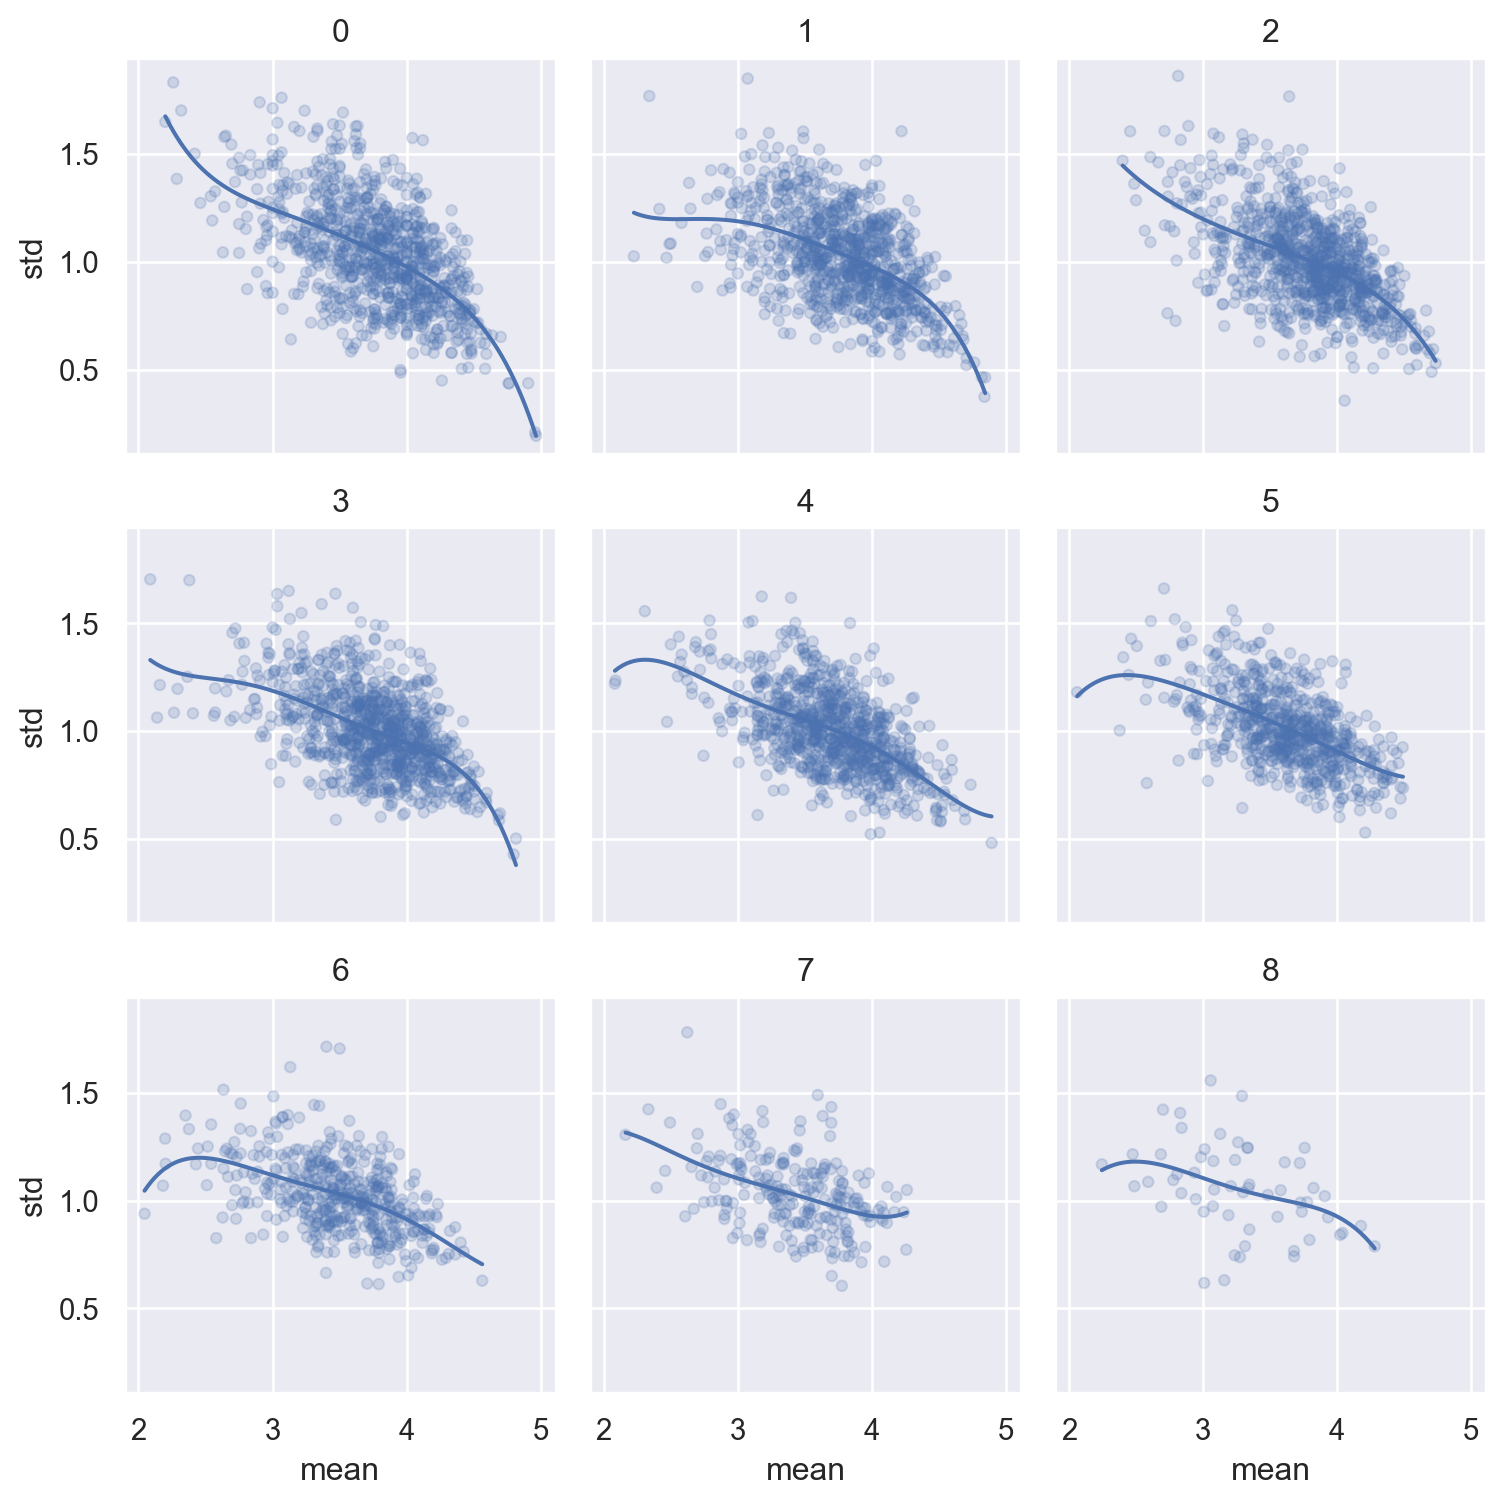

In [21]:
user_rating
usr = user_rating.groupby(['user_id','gender']).agg({'rating': ['mean', 'count','std']})
usr.columns = ['mean', 'count','std']
usr.reset_index(inplace=True)
usr

user_id gender  mean  count  std
0           1      F  4.19     53 0.68
1           2      M  3.71    129 1.00
2           3      M  3.90     51 0.98
...       ...    ...   ...    ...  ...
6037     6038      F  3.80     20 1.11
6038     6039      F  3.88    123 0.73
6039     6040      M  3.58    341 1.18

[6040 rows x 5 columns]

8.1 우선 개인별(성별로 나눠)로 몇 개정도나 평점을 주었는지 분포를 살펴봅니다.

8.2 개인별로 평점의 평균(mean)과 표준편차(std), 개수(count)를 구합니다; 성별 차는 없는 것으로 간주함

8.3 이 세 변수의 관계를 보기 위해, 평점 개수(count)를 10개의 구간으로 pd.cut을 이용해 discretize해서 살펴봅니다.
8.1에서 분포를 살펴보았으면, 개수를 먼저 log 스케일로 변환해서 구간으로 쪼개는 것이 유리함을 알 것입니다. (np.log 이용)

즉, 대다수는 2백개 이하의 평점을 남긴 반면, 소수의 유저들 중에는 수천개의 평점을 남긴 사람도 있습니다.
10개 구간으로 discretized된 (log) count를 .facet을 이용해 아래와 같이 유저들 각자의 평점 평균과 표준편차의 관계를 살펴봅니다;

In [22]:
df =usr.copy()
# count를 log 변환하여 10개 구간으로 분할
df['log_count'] = np.log(df['count'])
df['count_bin'] = pd.cut(df['log_count'], bins=10)

df

user_id gender  mean  count  std  log_count       count_bin
0           1      F  4.19     53 0.68       3.97  (3.946, 4.421]
1           2      M  3.71    129 1.00       4.86  (4.421, 4.896]
2           3      M  3.90     51 0.98       3.93  (3.471, 3.946]
...       ...    ...   ...    ...  ...        ...             ...
6037     6038      F  3.80     20 1.11       3.00  (2.991, 3.471]
6038     6039      F  3.88    123 0.73       4.81  (4.421, 4.896]
6039     6040      M  3.58    341 1.18       5.83  (5.371, 5.846]

[6040 rows x 7 columns]

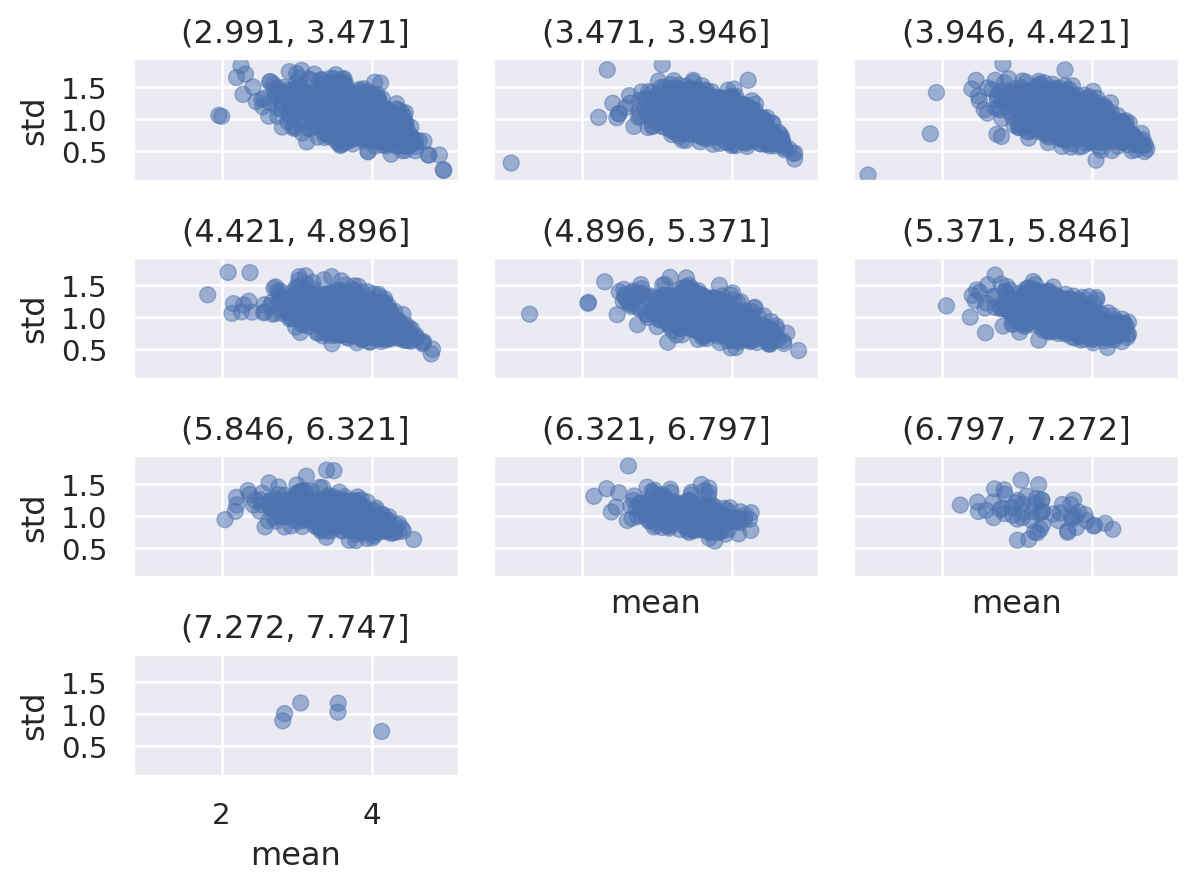

In [23]:
(
  so.Plot(df, x="mean", y="std")
  .facet('count_bin',wrap=3)
  .add(so.Dot(alpha=.5))
)

데이터 상에서 개인별로 평점을 많이 남긴 유저들이 상대적으로 적은 평점을 남긴 유저들보다 높은 평점을 준 경향이 있습니다. 이러한 현상은 "빈도수 효과" 또는 "빈도-평가 효과"라고도 불리며, 유저들이 자주 평가하는 영화에 대해서는 상대적으로 높은 평점을 주는 경향이 있기 때문입니다.

따라서, 개인별로 평점을 많이 남긴 유저들은 평균적으로 상대적으로 높은 평점을 주는 경향이 있습니다. 그러나 이러한 경향이 빈도수 효과에 의한 것인지, 그렇지 않은 다른 이유에 의한 것인지는 분석 결과만으로는 명확히 알 수 없습니다.

또한, 낮은 평점을 준 소위 "짠 유저들"이 더 비판적이고 고민을 끝에 낸 결과로 평점을 준다는 것은 일반적인 가정이지만, 이것이 항상 맞는 것은 아닙니다. 유저들의 평가는 주관적이며, 개인의 취향, 경험, 문화적 배경 등에 따라 다르기 때문입니다. 따라서, 이러한 가정은 객관적인 분석 결과로 입증되지 않는 한 항상 적용될 수 있는 것은 아닙니다.



---



9. 장르별로 남녀의 선호 차이를 두 관점 1) 평점의 개수/비율, 2) 평점의 평균의 관점에서 따로 살펴봅니다.
- movies 데이터에서 장르(genres)는 여러 장르에 포함되는 것을 | 기호로 나누어 표기되어 있고, 분석을 위해서 다음 코드를 이용해 long format으로 각 장르가 열에 한번씩만 나오도록 다음과 같이 바꾸세요.


```
# 코드로 형식 지정됨
movies_long = movies.copy()

movies_long["genres"] = movies_long["genres"].str.split("|")
movies_long = movies_long.explode("genres")

movies_long.head(8)
#    movie_id                    title      genres
# 0         1         Toy Story (1995)   Animation
# 0         1         Toy Story (1995)  Children's
# 0         1         Toy Story (1995)      Comedy
# 1         2           Jumanji (1995)   Adventure
# 1         2           Jumanji (1995)  Children's
# 1         2           Jumanji (1995)     Fantasy
# 2         3  Grumpier Old Men (1995)      Comedy
# 2         3  Grumpier Old Men (1995)     Romance

```
이 movie_long과 1번에서 만든 user_rating을 merge한 후 다음 문제를 이어가세요.



In [24]:
movies_long = movies.copy()

movies_long["genres"] = movies_long["genres"].str.split("|")
movies_long = movies_long.explode("genres")

movies_long.head(8)
#    movie_id                    title      genres
# 0         1         Toy Story (1995)   Animation
# 0         1         Toy Story (1995)  Children's
# 0         1         Toy Story (1995)      Comedy
# 1         2           Jumanji (1995)   Adventure
# 1         2           Jumanji (1995)  Children's
# 1         2           Jumanji (1995)     Fantasy
# 2         3  Grumpier Old Men (1995)      Comedy
# 2         3  Grumpier Old Men (1995)     Romance

movie_id                    title      genres
0          1         Toy Story (1995)   Animation
0          1         Toy Story (1995)  Children's
0          1         Toy Story (1995)      Comedy
..       ...                      ...         ...
1          2           Jumanji (1995)     Fantasy
2          3  Grumpier Old Men (1995)      Comedy
2          3  Grumpier Old Men (1995)     Romance

[8 rows x 3 columns]

9.1 장르별로 평점의 개수를 간단히 플랏으로 살펴보는데 남녀 별로 따로 비율이 나오도록 해보세요.

- so.Hist("proportion", common_norm=False)이 필요할 수 있음


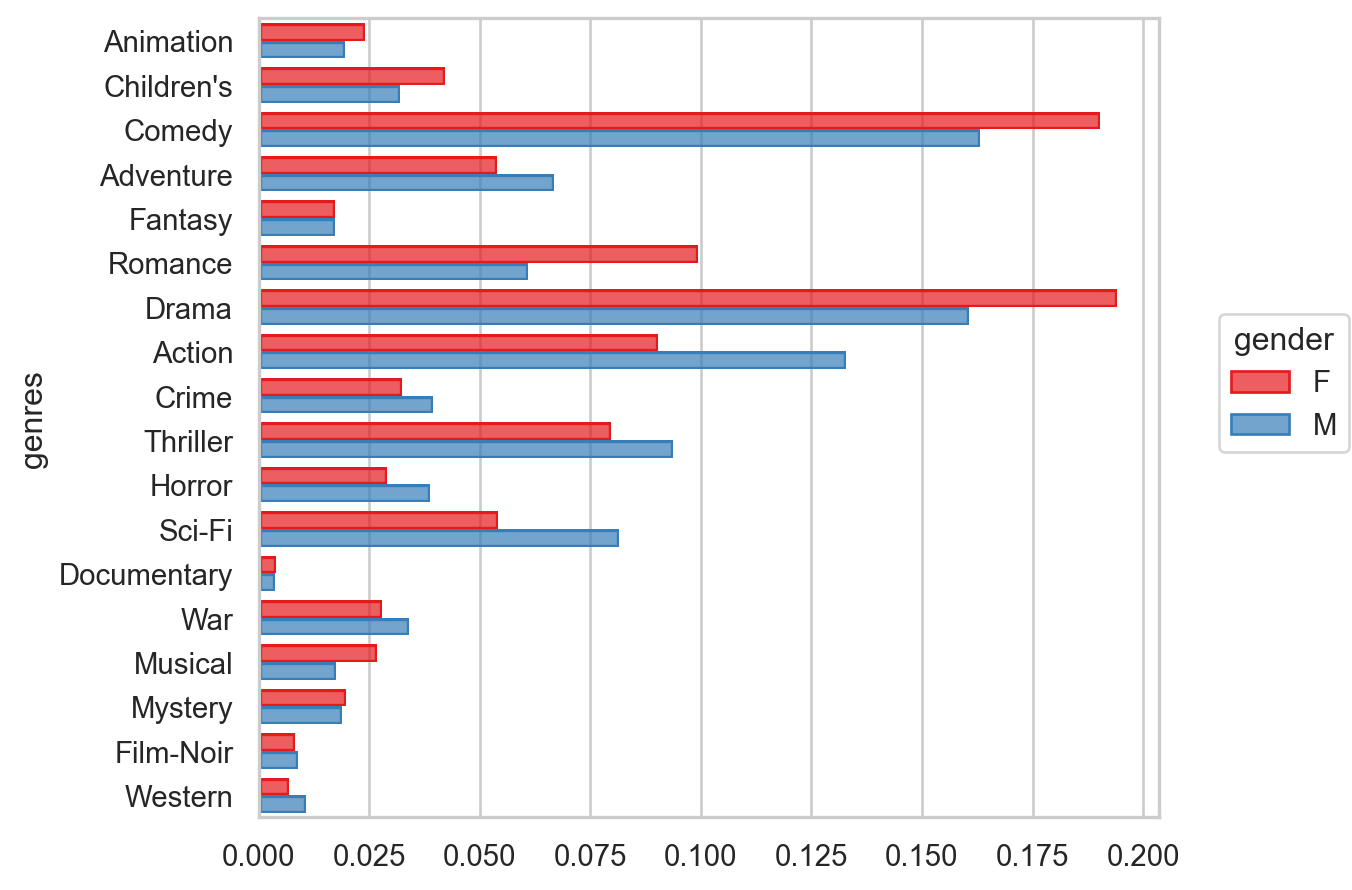

In [25]:
user_movies = pd.merge(result,movies_long)
user_movies

movie_id gender  mean  count  std                  title      genres
0             1      F  4.19    591 1.25       Toy Story (1995)   Animation
1             1      F  4.19    591 1.25       Toy Story (1995)  Children's
2             1      F  4.19    591 1.25       Toy Story (1995)      Comedy
...         ...    ...   ...    ...  ...                    ...         ...
12048      3952      F  3.76    105 0.66  Contender, The (2000)    Thriller
12049      3952      M  3.79    283 0.83  Contender, The (2000)       Drama
12050      3952      M  3.79    283 0.83  Contender, The (2000)    Thriller

[12051 rows x 7 columns]

장르별로 남녀의 선호 차이를 두 관점 1) 평점의 개수/비율, 2) 평점의 평균의 관점에서 따로 살펴봅니다.

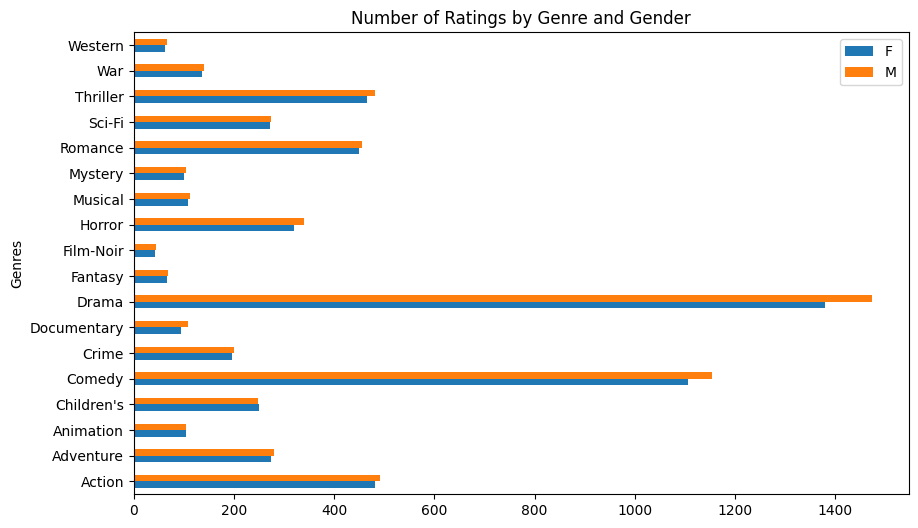

In [26]:
df1 = user_movies

import seaborn as sns
import matplotlib.pyplot as plt

# 장르별, 성별 평점 개수 계산
genre_gender_count = df1.groupby(['genres', 'gender']).count()['mean'].unstack()

# 플롯 그리기
genre_gender_count.plot(kind='barh', figsize=(10, 6))
plt.title('Number of Ratings by Genre and Gender')
plt.ylabel('Genres')
plt.legend(['F', 'M'], loc='best')
plt.show()

9.2 이번에는 장르별로 평점의 평균를 남녀별로 간단히 플랏으로 확인해보세요.

- so.Agg()를 활용하고,
- .limit(x=(3, 4.2))를 써서 확대해서 살펴보세요.

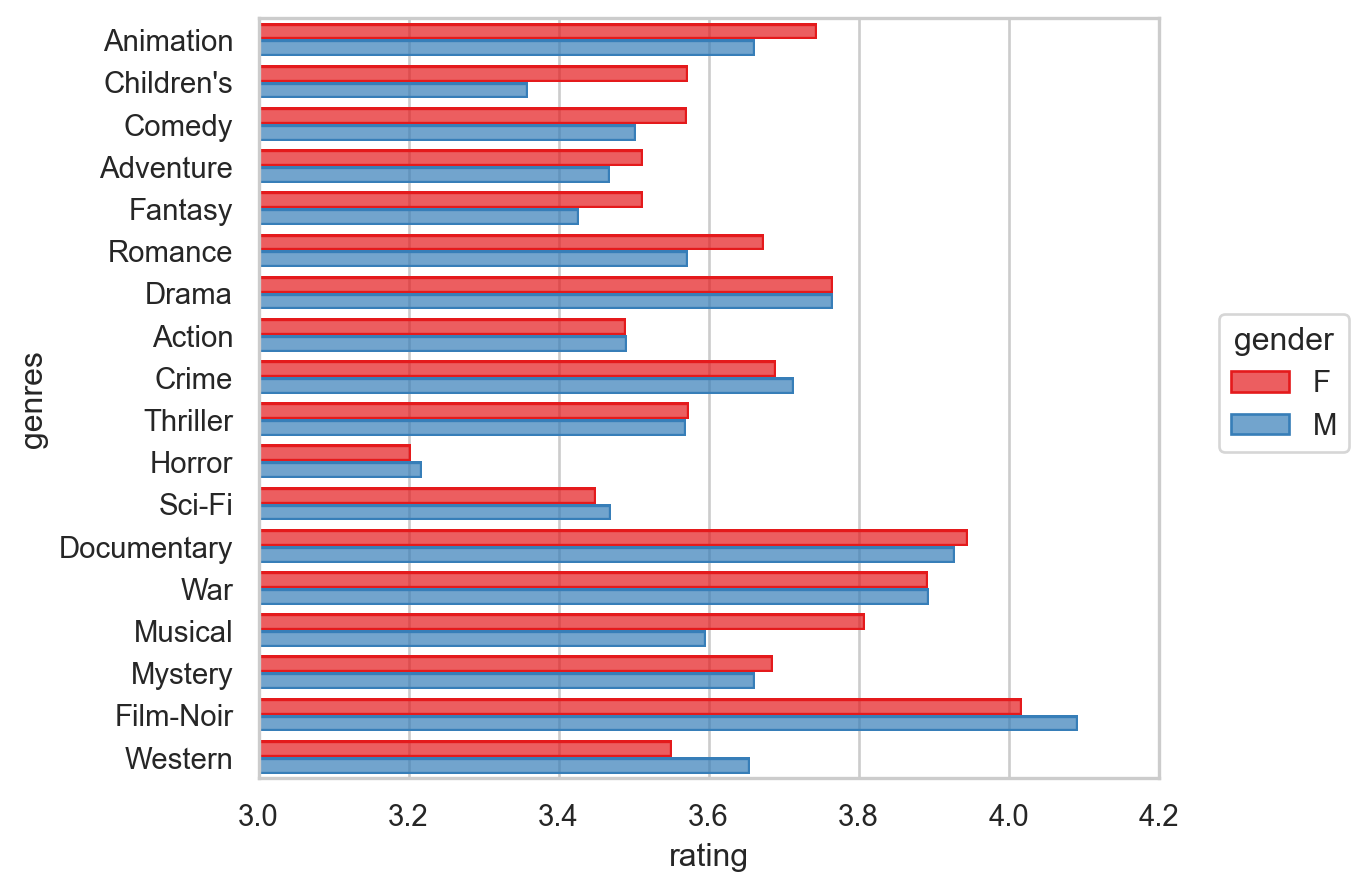

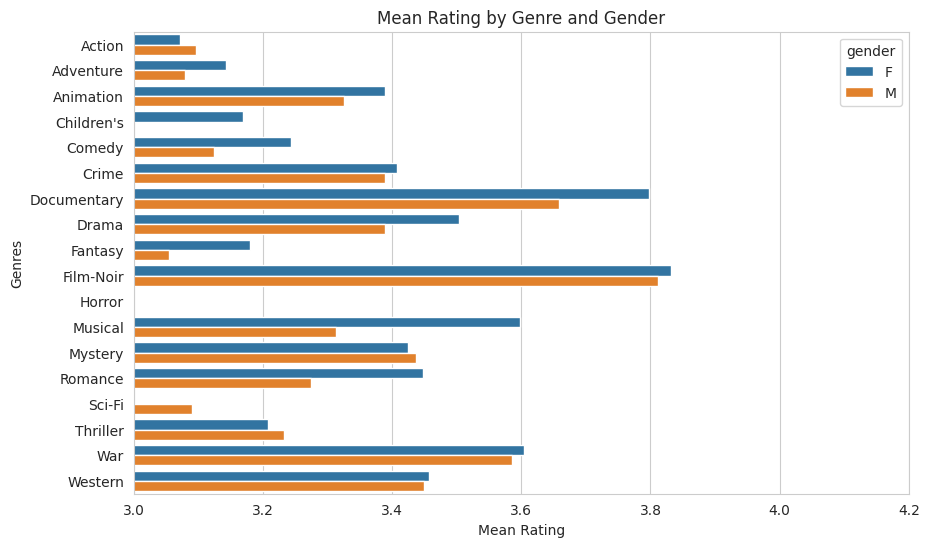

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
df1 = user_movies
# 장르별, 성별 평점 평균 계산
genre_gender_mean = df1.groupby(['genres', 'gender']).agg({'mean': 'mean'}).reset_index()


# 플롯 그리기
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(data=genre_gender_mean, x='mean', y='genres', hue='gender')
ax.set(title='Mean Rating by Genre and Gender', xlabel='Mean Rating', ylabel='Genres')
ax.set(xlim=(3, 4.2))
plt.show()

9.3 위의 플랏에서 살펴본 평균 평점의 값을 직접 구해봅니다. 장르별, 남녀로 그룹핑을 하여 평균 평점을 다음과 같이 나오도록 구해보세요.

- unstack()을 활용해 보세요.


```
# 코드로 형식 지정됨

# gender       genre    F    M
# 0           Action  ...  ...
# 1        Adventure  ...  ...
# ..             ...  ...  ...
# 16             War  ...  ...
# 17         Western  ...  ...
```



In [28]:
# 장르별, 성별 평점 평균 계산
genre_gender_mean = df1.groupby(['genres', 'gender']).agg({'mean': 'mean'}).unstack()

genre_gender_mean = genre_gender_mean.reset_index()
genre_gender_mean

genres mean     
gender               F    M
0          Action 3.07 3.10
1       Adventure 3.14 3.08
2       Animation 3.39 3.33
..            ...  ...  ...
15       Thriller 3.21 3.23
16            War 3.60 3.59
17        Western 3.46 3.45

[18 rows x 3 columns]

9.4 영화별 남녀의 평균 평점의 차이(Female - Male) 순으로 정렬된 플랏을 대략적으로 다음과 같이 그려봅니다.

- Customizing할 때, .limit(x=(3, 4.2))과 .scale(y=so.Nominal(order=[]))이 필요할 수 있습니다.

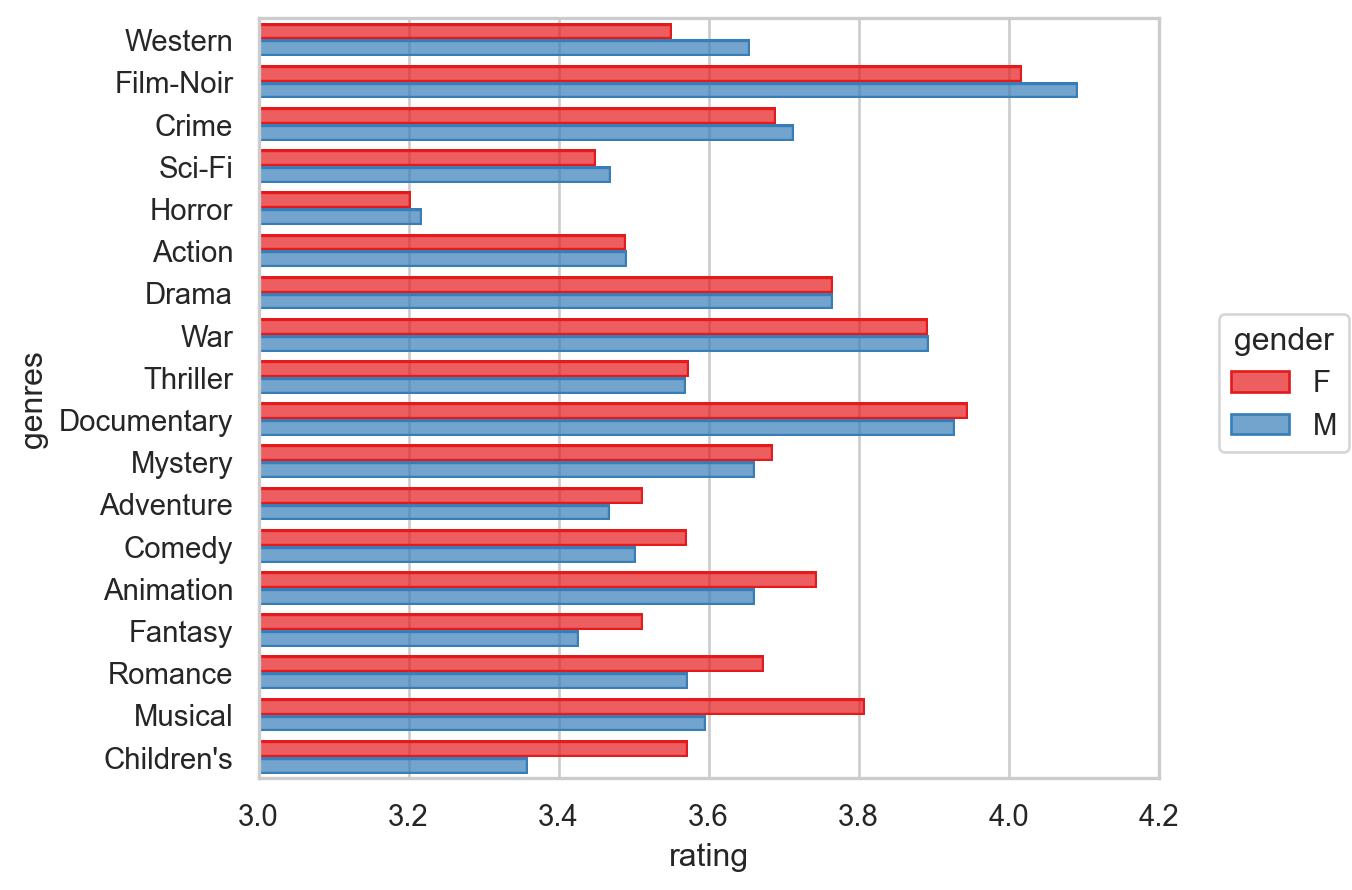

In [29]:
genre_gender_mean['diff'] = abs(genre_gender_mean['mean','F'] - genre_gender_mean['mean','M'])
genre_gender_mean

genres mean      diff
gender               F    M     
0          Action 3.07 3.10 0.02
1       Adventure 3.14 3.08 0.06
2       Animation 3.39 3.33 0.06
..            ...  ...  ...  ...
15       Thriller 3.21 3.23 0.03
16            War 3.60 3.59 0.02
17        Western 3.46 3.45 0.01

[18 rows x 4 columns]

In [30]:
# 장르별, 성별 평점 평균 계산

# diff 컬럼을 기준으로 데이터프레임 정렬
genre_gender_mean = genre_gender_mean.sort_values(by='diff', ascending=False)

# 플롯 그리기
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(data=genre_gender_mean, x='mean', y='genres', hue='gender')
ax.set(title='Mean Rating by Genre and Gender', xlabel='Mean Rating', ylabel='Genres')
ax.set(xlim=(3, 4.2))
plt.show()


ValueError: ignored

<Figure size 1000x600 with 0 Axes>

In [31]:
# gender 열을 새로운 열로 만들기
genre_gender_mean.reset_index(inplace=True)
genre_gender_mean['gender'] = genre_gender_mean['gender'].astype(str)

# 플롯 그리기
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(data=genre_gender_mean, x='mean', y='genres', hue='gender', hue_order=['F', 'M'])
ax.set(title='Mean Rating by Genre and Gender', xlabel='Mean Rating', ylabel='Genres')
ax.set(xlim=(3, 4.2))
plt.show()


KeyError: ignored

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# diff를 기준으로 데이터프레임 정렬
genre_gender_mean = genre_gender_mean.sort_values(by='diff', ascending=False)

# 플롯 그리기
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(data=genre_gender_mean, x='mean', y='genres', hue='gender', hue_order=['F', 'M'])
ax.set(title='Mean Rating by Genre and Gender', xlabel='Mean Rating', ylabel='Genres')
ax.set(xlim=(3, 4.2))
ax.set(yticklabels=genre_gender_mean['genres'])
plt.show()


ValueError: ignored

<Figure size 1000x600 with 0 Axes>

9.5 평점의 장르별 분포를 boxplot으로 볼 수도 있지만, 대신 seaborn.object의 Range()를 써서 평균과 표준편차를 다음과 같이 그려보세요.

- range는 .add(so.Range(), so.Est("mean", errorbar="sd"))를 활용하고
- 평균은 Agg()을 이용해 표시합니다.

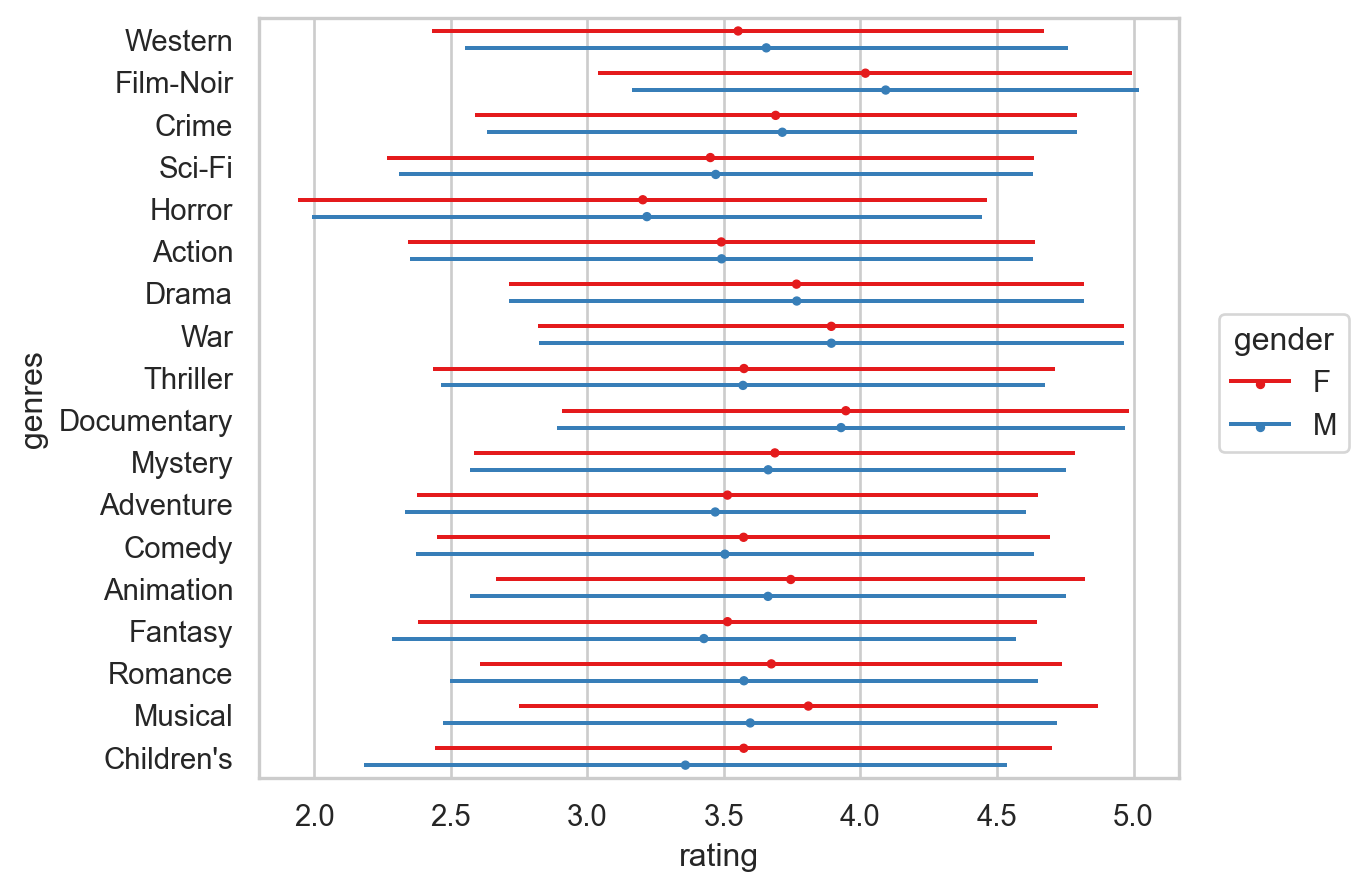



---



10. 장르별로 나이대에 따른 영화시청에 차이가 있는지 살펴봅니다. 나이는 다음과 같이 코딩되어 있습니다.
- 1: “Under 18”
- 18: “18-24”
- 25: “25-34”
- 35: “35-44”
- 45: “45-49”
- 50: “50-55”
- 56: “56+”

9번에서 데이터를 만들지 못한 경우 경우, 다음 .parquet 파일을 받아 이용해 다음 문제를 이어가세요.

In [ ]:
pd.read_parquet("data/movies_long_all.parquet")

10.1 우선, 위에서 western 장르가 남녀의 평점 차이가 가장 크게 나타나 남성이 선호하는 것으로 보이는데 western 장르만 따로 떼어 나이대/남녀 별로 rating에 차이가 있는지 살펴봅니다.

- 우선 scatterplot으로 살펴보는 것이 유용한지 체크해보세요.
- 개선할 방법이 있을까요?
- Fitted line만을 so.PolyFit(5)을 이용하여 다음과 같이 그려보세요.
> x축 눈금은 .scale(x=so.Continuous().tick(at=[1, 18, 25, 35, 45, 50, 56]))
- 어떤 점을 파악할 수 있나요?

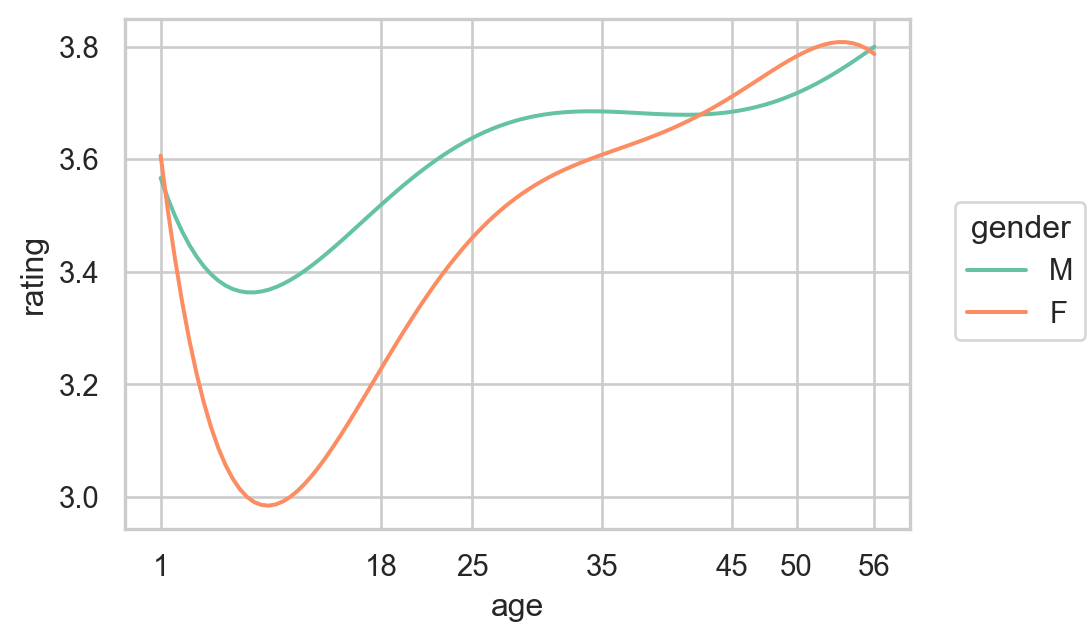

10.2 western 장르의 남녀 차이는 18:18-24세 사이에 가장 커보이고 그 갭은 다른 연령대에서는 줄어드는 것으로 보입니다.

- 하지만, 만약 18-24세 대에서 남성이 여성에 비해 과하게 많은 평점을 내렸다면 적절한 결론이 아닐 수 있습니다. 즉, 18-24세 대에서 평점의 개수 비율이 남녀가 동일해야 좀 더 확신을 가질 수 있습니다.
- 이를 확인하기 위해 다음과 같은 테이블을 구해보세요.
- 예를 들어, 18:18-24세 남성의 14%와 여성의 14%가 평점을 남겼으며, 45:45-49세 남성의 15%와 여성의 9%가 평점을 남겼습니다.

>

```
# 코드로 형식 지정됨
    age gender  mean  size  total  ratio
0     1      F  3.60    91   3477   0.03
1     1      M  3.57   244  17206   0.01
2    18      F  3.24   503   3477   0.14
3    18      M  3.52  2360  17206   0.14
4    25      F  3.45  1034   3477   0.30
5    25      M  3.63  6019  17206   0.35
6    35      F  3.63   791   3477   0.23
7    35      M  3.69  3755  17206   0.22
8    45      F  3.67   508   3477   0.15
9    45      M  3.67  1625  17206   0.09
10   50      F  3.83   330   3477   0.09
11   50      M  3.73  2090  17206   0.12
12   56      F  3.77   220   3477   0.06
13   56      M  3.80  1113  17206   0.06
```


10.3 이 테이블을 다음과 같이 비율을 pointsize에 mapping하여 시각화해보고, 동일한 나이대에서 남녀의 평점 개수 비율에 차이가 크게 나는지 살펴보세요.

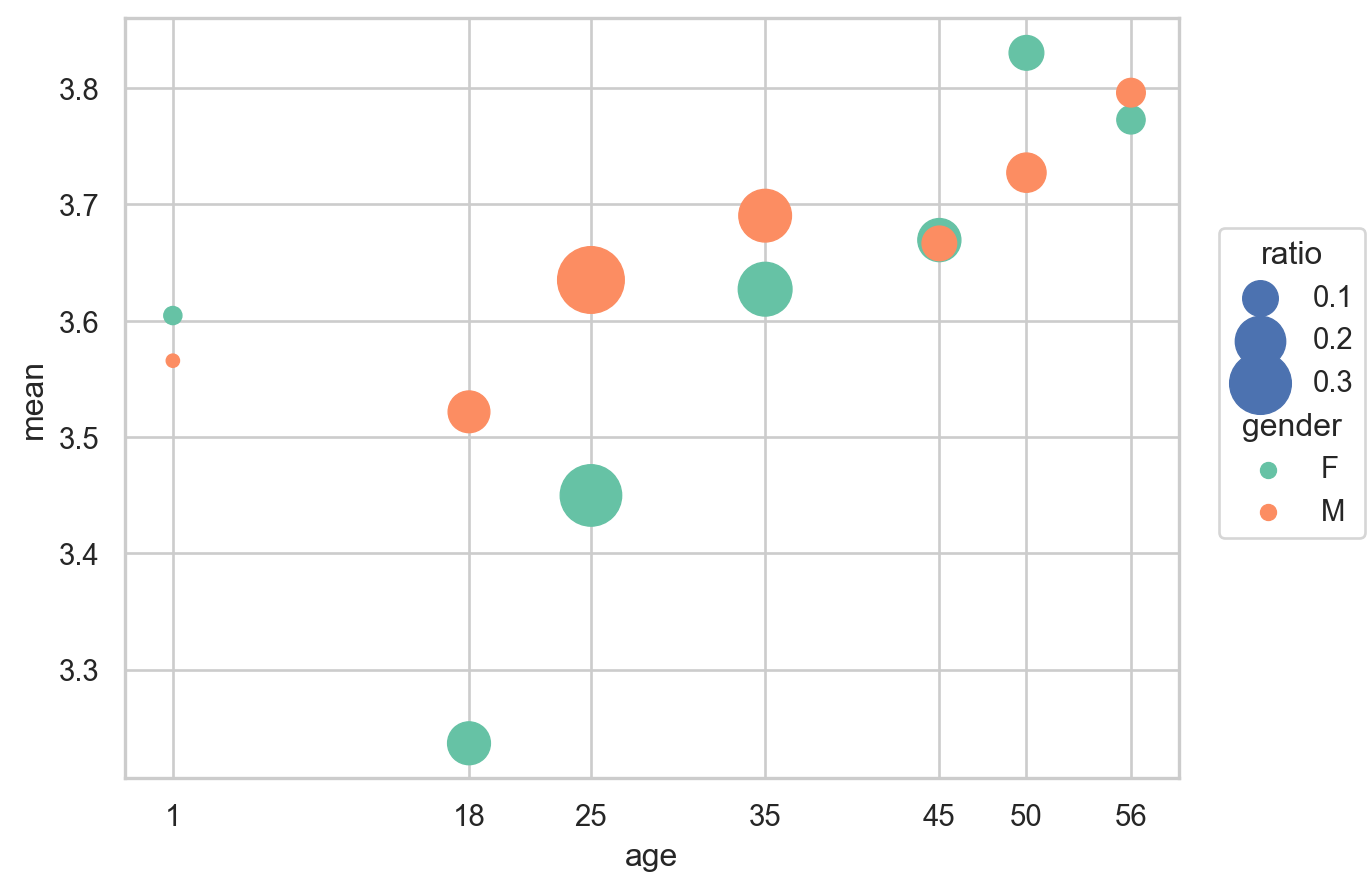

10.4 이제 모든 장르를 한눈에 살펴보기 위해 facet을 이용해 다음과 같이 시각화해보세요.

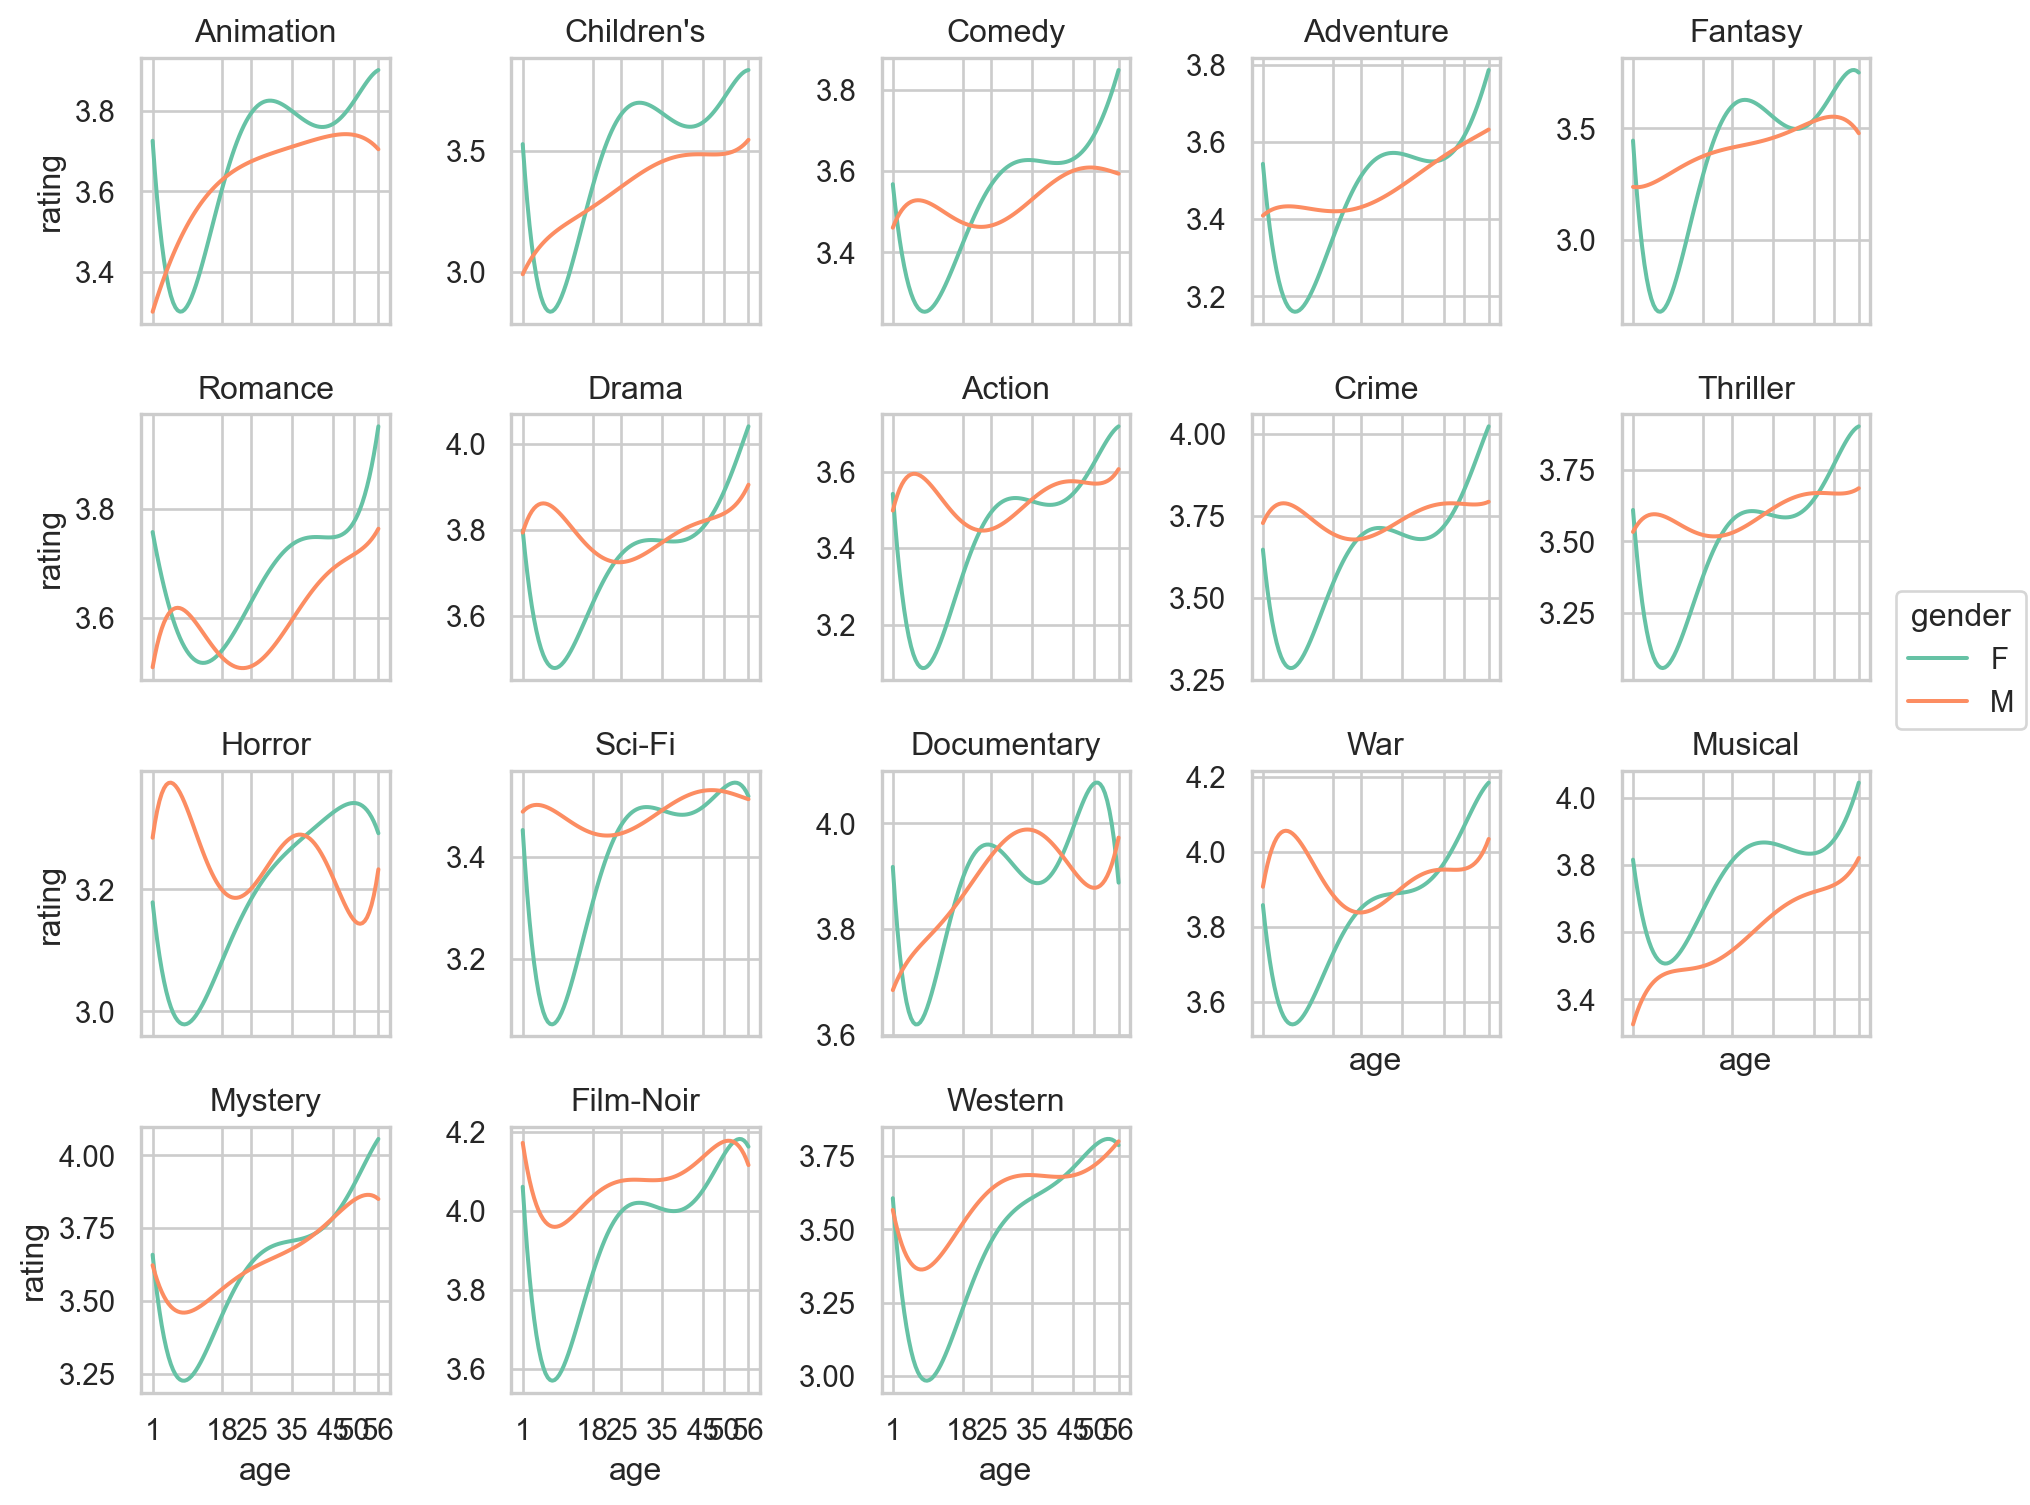



---



11. 영화 제목에 있는 출시년도를 추출해 이용하기 위해 다음 코드를 활용하세요.

In [ ]:
movies["year"] = movies["title"].str.extract(r'\((\d{4})\)').astype("int")
movies

11.1 먼저 출시년도별로 얼마나 영화가 있는지 분포를 살펴보세요.

11.2 출시년도가 없는 영화가 있는가요?

11.3 오래된 영화일수록 나이든 사람들의 시청 비율이 높을지에 대해 분포를 살펴보세요.

 - 나이를 다음과 같이 카테고리화하여 분석합니다.


```
# 코드로 형식 지정됨
.assign(
    age = lambda x: pd.Categorical(x.age, categories=["1", "18", "25", "35", "45", "50", "56"], ordered=True)
)
```
- 나이를 row에 facet하는 방식으로 분포를 살펴보세요.




---



12. 10년 기준으로 년대를 정했을 때, 년대에 따라 장르들의 비율이 어떻게 변화했는지 살펴봅니다.
- 예를 들어, 코메디 장르의 경우 아래 플랏처럼 1920년대에 다른 장르에 비해 상대적으로 높은 비율을 보이다가 1950년대까지는 쭉 낮아지다 다시 증가하는 비율을 보입니다.

- 장르별로 facet을 하여 모든 장르들의 비율 변화를 그려보세요.

- 우선 년대를 다음 방식으로 만든 후, 예를 들어, 1990-1999년은 1990이 되도록 한 후


```
# 코드로 형식 지정됨
movies.assign(
    decade = lambda x: np.floor(x.year / 10) * 10  # np.floor(): 내림
)
```

- decade와 genres에 대해 pd.crosstab()을 적용하여 비율에 대한 테이블을 만든 후 그려보세요.

- pd.crosstab()의 파라미터를 확인해서 비율을 구하세요.


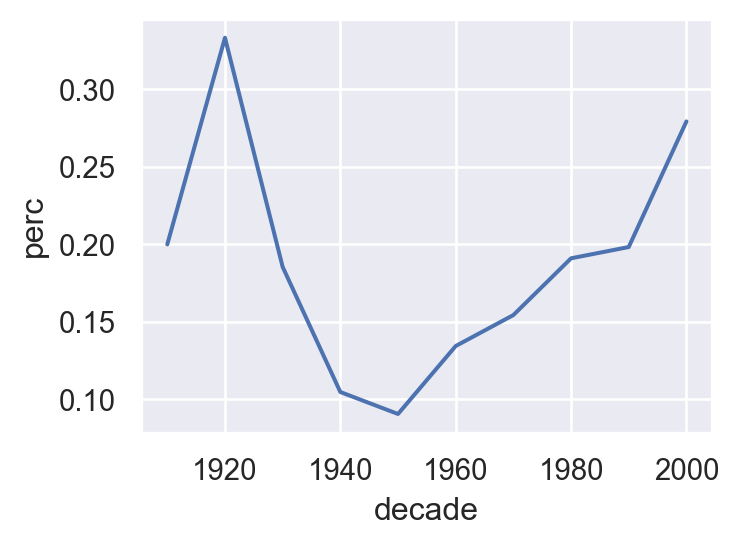



---



13. 매니아적 성향을 파악해 봅니다.
- 13.1 유저들 중에는 소수의 특정 장르만을 시청할 수 있는데, 다시 말해서 유저별 장르의 편향성을 알아볼 수 있는 지표를 만들어 특정 장르만을 독식하는 유저들을 파악해보는 방식에 대해 아이디어를 기술해보고, 코드로 구현할 수 있는 스텝을 대략 제시해보세요.

- 13.2 구현된 코드로 실행한 결과를 표시해보세요.

예를 들어, 유저별로 장르마다 몇 %씩을 평가했는지와 전체 유저의 장르별 평가 비율을 구해 상대적으로 유저들이 얼마나 치우쳐 장르를 소비하는 지를 알아보는 방식도 좋겠습니다.